# <font color='#6593a4'>Exploratory Data Analysis</font> <a class="anchor" id="second-bullet"></a> 

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_classification

In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
train = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')
test = test_data.copy()

In [4]:
train

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0
...,...,...,...,...,...,...,...,...,...,...,...
895,896,6253,3,Ms. Linda Wilcox,1998.0,1,1,344,NaN,Santa Fe,0
896,897,6483,3,Mr. Haiden Vance,2006.0,0,0,258,NaN,Santa Fe,0
897,898,981,3,Miss Anaiya Love,1990.0,0,0,214,NaN,Taos,1
898,899,16418,2,Mr. Robert Williams,1994.0,1,1,812,NaN,Santa Fe,0


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
train.loc[train['Family_Case_ID'] == 14502]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
36,37,14502,3,Master Elijah Devin,NaN,2,8,1947,NaN,Santa Fe,1
40,41,14502,3,Miss Kim Elizabeth,NaN,2,8,1947,NaN,Santa Fe,1
229,230,14502,3,Miss Hazel Esther,NaN,2,8,1947,NaN,Santa Fe,1
316,317,14502,3,Master Wilson Sheldon,NaN,2,8,1947,NaN,Santa Fe,1
595,596,14502,3,Master Brent Jordan,NaN,2,8,1947,NaN,Santa Fe,1
596,597,14502,3,Miss Rachel Teri,NaN,2,8,1947,NaN,Santa Fe,1
854,855,14502,3,Master Randall Angel,NaN,2,8,1947,NaN,Santa Fe,1


In [7]:
train.shape

(900, 11)

In [8]:
train.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents_Children_Infected', 'Partner_Siblings_Infected',
       'Medical_Expenses_Family', 'Medical_Tent', 'City', 'Deceased'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 900 non-null    int64  
 1   Family_Case_ID             900 non-null    int64  
 2   Severity                   900 non-null    int64  
 3   Name                       900 non-null    object 
 4   Birthday_year              723 non-null    float64
 5   Parents_Children_Infected  900 non-null    int64  
 6   Partner_Siblings_Infected  900 non-null    int64  
 7   Medical_Expenses_Family    900 non-null    int64  
 8   Medical_Tent               198 non-null    object 
 9   City                       898 non-null    object 
 10  Deceased                   900 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 77.5+ KB


In [10]:
train.isna().sum()

Patient_ID                     0
Family_Case_ID                 0
Severity                       0
Name                           0
Birthday_year                177
Parents_Children_Infected      0
Partner_Siblings_Infected      0
Medical_Expenses_Family        0
Medical_Tent                 702
City                           2
Deceased                       0
dtype: int64

In [11]:
# check inconsistent values
train.describe()

,Patient_ID,Family_Case_ID,Severity,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Deceased
count,900.000000,900.000000,900.000000,723.000000,900.000000,900.000000,900.000000,900.000000
mean,450.500000,14305.827778,2.313333,1990.266943,0.380000,0.521111,895.743333,0.614444
std,259.951919,25418.153900,0.834223,14.523335,0.803247,1.098385,1385.829926,0.486997
min,1.000000,345.000000,1.000000,1940.000000,0.000000,0.000000,0.000000,0.000000
25%,225.750000,8203.000000,2.000000,1982.000000,0.000000,0.000000,221.000000,0.000000
50%,450.500000,13593.500000,3.000000,1992.000000,0.000000,0.000000,405.000000,1.000000
75%,675.250000,18906.500000,3.000000,1999.500000,0.000000,1.000000,861.250000,1.000000
max,900.000000,742836.000000,3.000000,2019.000000,6.000000,8.000000,14345.000000,1.000000


In [12]:
#To see which families have more members infected 
train['Family_Case_ID'].mode()

0    14502
1    18593
2    20586
dtype: int64

In [13]:
train.loc[train['Family_Case_ID'] == 20586]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
102,103,20586,3,Miss Lora Rosemary,2014.0,2,4,876,NaN,Santa Fe,1
136,137,20586,3,Miss Cecilia Kathy,2009.0,2,4,876,NaN,Santa Fe,1
173,174,20586,3,Mr. Ruben Duane,1981.0,5,1,876,NaN,Santa Fe,1
188,189,20586,3,Miss Thelma Ora,2018.0,2,4,876,NaN,Santa Fe,1
269,270,20586,3,Miss Joanna Ollie,2011.0,2,4,876,NaN,Santa Fe,1
519,520,20586,3,Master Hugo Grant,2016.0,2,4,876,NaN,Santa Fe,1
670,671,20586,3,Ms. Suzanne Maureen,1981.0,5,1,876,NaN,Santa Fe,1


In [14]:
train.describe(include=['O'])

,Name,Medical_Tent,City
count,900,198,898
unique,899,8,3
top,Mr. Samuel Darnell,C,Santa Fe
freq,2,57,649


In [15]:
# Check city values
train['City'].value_counts()

Santa Fe       649
Albuquerque    169
Taos            80
Name: City, dtype: int64

In [16]:
train['Deceased'].value_counts()

1    553
0    347
Name: Deceased, dtype: int64

In [17]:
#There is NO full row dplicated
train[train.duplicated (keep=False)]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased


In [18]:
#There is 1 name duplicated + print those lines
DuplicateNameRows = train[train['Name'].duplicated(keep=False)]
print(DuplicateNameRows)

     Patient_ID  Family_Case_ID  Severity                Name  Birthday_year  \
568         569           21740         1  Mr. Samuel Darnell         1985.0   
682         683           17721         3  Mr. Samuel Darnell         1988.0   

     Parents_Children_Infected  Partner_Siblings_Infected  \
568                          0                          0   
682                          0                          0   

     Medical_Expenses_Family Medical_Tent      City  Deceased  
568                      736            E  Santa Fe         0  
682                      222          NaN  Santa Fe         1  


In [19]:
#is a duplicate?
train.loc[train['Name'] == "Mr. Samuel Darnell"]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
568,569,21740,1,Mr. Samuel Darnell,1985.0,0,0,736,E,Santa Fe,0
682,683,17721,3,Mr. Samuel Darnell,1988.0,0,0,222,NaN,Santa Fe,1


In [20]:
#to see if we have any column that is almost all null we checked the percentage, we don´t
train.isna().sum()/len(train)*100

Patient_ID                    0.000000
Family_Case_ID                0.000000
Severity                      0.000000
Name                          0.000000
Birthday_year                19.666667
Parents_Children_Infected     0.000000
Partner_Siblings_Infected     0.000000
Medical_Expenses_Family       0.000000
Medical_Tent                 78.000000
City                          0.222222
Deceased                      0.000000
dtype: float64

In [21]:
#doesn't work because the column Birthday_year has null values
train.dtypes

Patient_ID                     int64
Family_Case_ID                 int64
Severity                       int64
Name                          object
Birthday_year                float64
Parents_Children_Infected      int64
Partner_Siblings_Infected      int64
Medical_Expenses_Family        int64
Medical_Tent                  object
City                          object
Deceased                       int64
dtype: object

### <font color='#6593a4'>Data Exploration for Test Set</font> <a class="anchor" id="second-bullet"></a> 

In [22]:
test.describe()

,Patient_ID,Family_Case_ID,Severity,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family
count,400.000000,400.000000,400.000000,318.000000,400.000000,400.000000,400.000000
mean,1100.500000,46024.932500,2.247500,1989.707547,0.400000,0.452500,1013.870000
std,115.614301,39279.856807,0.844409,14.171527,0.998746,0.910944,1587.588114
min,901.000000,1162.000000,1.000000,1944.000000,0.000000,0.000000,0.000000
25%,1000.750000,13487.000000,1.000000,1980.250000,0.000000,0.000000,221.000000
50%,1100.500000,26721.500000,3.000000,1993.000000,0.000000,0.000000,406.000000
75%,1200.250000,79045.000000,3.000000,1999.000000,0.000000,1.000000,883.250000
max,1300.000000,128562.000000,3.000000,2019.000000,9.000000,8.000000,14345.000000


In [23]:
test.loc[test['Family_Case_ID'] == 14502]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City
67,968,14502,3,Master Willie Pat,2005.0,2,8,1947,NaN,Santa Fe
76,977,14502,3,Mr. Kenny Clinton,NaN,9,1,1947,NaN,Santa Fe
178,1079,14502,3,Mrs. Rebecca Jessica,NaN,2,8,1947,NaN,Santa Fe
258,1159,14502,3,Mrs. Juana Lillie,NaN,9,1,1947,NaN,Santa Fe


In [24]:
test.describe(include=['O'])

,Name,Medical_Tent,City
count,400,89,400
unique,400,7,3
top,Mr. Allan Vincent,C,Santa Fe
freq,1,33,260


In [25]:
test.dtypes

Patient_ID                     int64
Family_Case_ID                 int64
Severity                       int64
Name                          object
Birthday_year                float64
Parents_Children_Infected      int64
Partner_Siblings_Infected      int64
Medical_Expenses_Family        int64
Medical_Tent                  object
City                          object
dtype: object

In [26]:
test.isna().sum()

Patient_ID                     0
Family_Case_ID                 0
Severity                       0
Name                           0
Birthday_year                 82
Parents_Children_Infected      0
Partner_Siblings_Infected      0
Medical_Expenses_Family        0
Medical_Tent                 311
City                           0
dtype: int64

### <font color='#ecab97'>Data Preparation</font> <a class="anchor" id="second-bullet"></a> 

In [27]:
# Check medical tent values
train['Medical_Tent'].value_counts()

C    57
B    46
D    31
E    31
A    15
F    13
G     4
T     1
Name: Medical_Tent, dtype: int64

In [28]:
#Because the Medical Tent T only had 1 ID ---> changed it to G because were both the only ones that hap patients from Santa Fe 
## which could be related


train['Medical_Tent'] = train['Medical_Tent'].replace(['T'],'G')
train_data = train.copy()

train_data['Medical_Tent'].fillna('U', inplace=True)
test['Medical_Tent'].fillna('U', inplace=True)

In [29]:
train_data.groupby(['Medical_Tent','Severity', 'Deceased'])[['Patient_ID']].count()

Patient_ID
Medical_Tent Severity Deceased            
A            1        0                  7
                      1                  8
B            1        0                 34
                      1                 12
C            1        0                 33
                      1                 23
             3        0                  1
D            1        0                 20
                      1                  7
             2        0                  3
                      1                  1
E            1        0                 17
                      1                  7
             2        0                  3
                      1                  1
             3        0                  3
F            2        0                  7
                      1                  1
             3        0                  1
                      1                  4
G            1        1                  1
             3        0                  2
                      1                  2
U            1        0                 25
                      1                 22
             2        0                 75
                      1                 95
             3        0                116
                      1                369

In [30]:
train_data

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,U,Santa Fe,1
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,U,Albuquerque,0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,U,Santa Fe,1
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,U,Santa Fe,1
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,U,Santa Fe,0
...,...,...,...,...,...,...,...,...,...,...,...
895,896,6253,3,Ms. Linda Wilcox,1998.0,1,1,344,U,Santa Fe,0
896,897,6483,3,Mr. Haiden Vance,2006.0,0,0,258,U,Santa Fe,0
897,898,981,3,Miss Anaiya Love,1990.0,0,0,214,U,Taos,1
898,899,16418,2,Mr. Robert Williams,1994.0,1,1,812,U,Santa Fe,0


<AxesSubplot:xlabel='Medical_Tent', ylabel='count'>

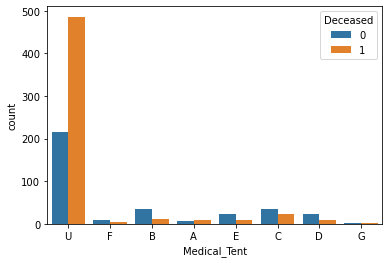

In [31]:
sns.countplot(x='Medical_Tent', hue='Deceased', data=train_data)

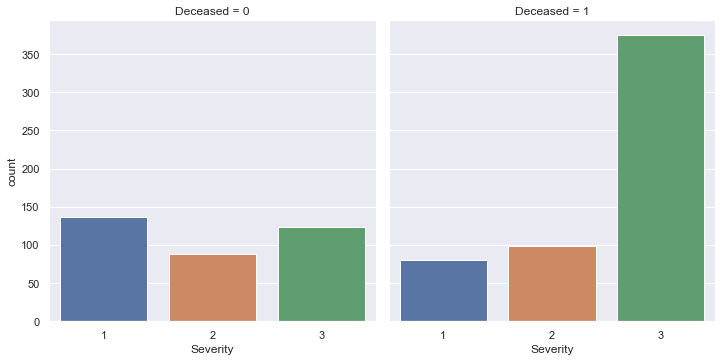

In [270]:
sns.factorplot(x='Severity',col='Deceased', kind='count', data=train_data)

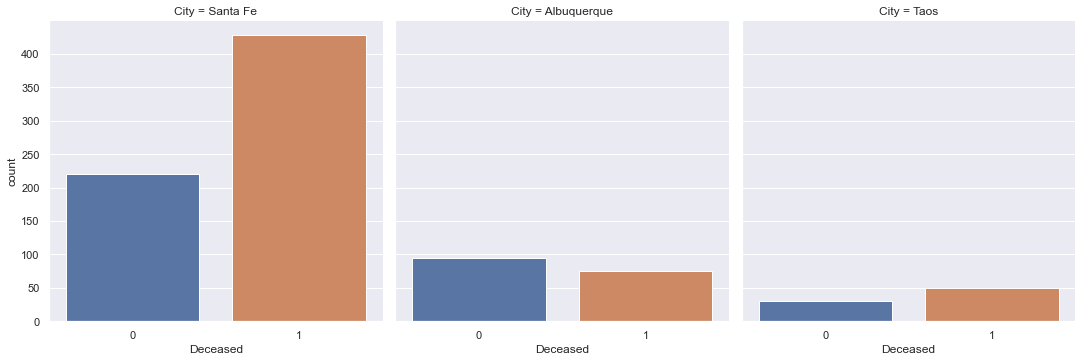

In [268]:
sns.factorplot(x='Deceased',col='City', kind='count', data=train_data)

<AxesSubplot:xlabel='Severity', ylabel='Deceased'>

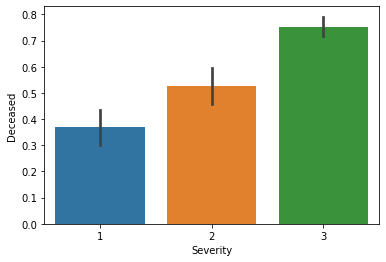

In [34]:
sns.barplot(x='Severity',y='Deceased', data=train_data)

<AxesSubplot:xlabel='Deceased', ylabel='Medical_Expenses_Family'>

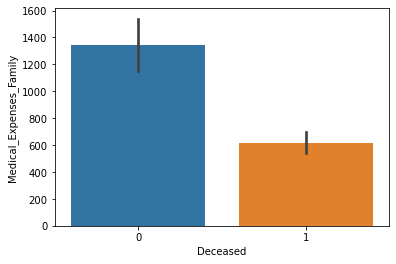

In [35]:
sns.barplot(x='Deceased', y='Medical_Expenses_Family', data=train_data)

<AxesSubplot:xlabel='Deceased', ylabel='Medical_Expenses_Family'>

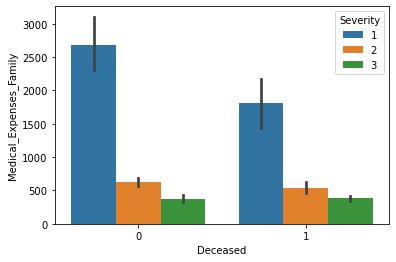

In [36]:
sns.barplot(x='Deceased', y='Medical_Expenses_Family', hue='Severity', data=train_data)

<AxesSubplot:xlabel='Medical_Tent', ylabel='Severity'>

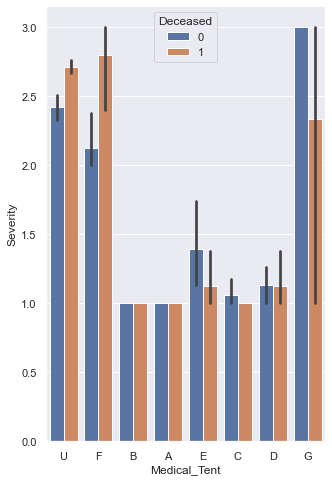

In [277]:
sns.barplot(x='Medical_Tent', y='Severity', hue='Deceased', data=train_data)

In [37]:
number_fam = train_data.copy()
number_fam['Direct_Family_Infected'] = train_data['Parents_Children_Infected'] + train_data['Partner_Siblings_Infected']
number_fam

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Direct_Family_Infected
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,U,Santa Fe,1,0
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,U,Albuquerque,0,1
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,U,Santa Fe,1,0
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,U,Santa Fe,1,0
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,U,Santa Fe,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,6253,3,Ms. Linda Wilcox,1998.0,1,1,344,U,Santa Fe,0,2
896,897,6483,3,Mr. Haiden Vance,2006.0,0,0,258,U,Santa Fe,0,0
897,898,981,3,Miss Anaiya Love,1990.0,0,0,214,U,Taos,1,0
898,899,16418,2,Mr. Robert Williams,1994.0,1,1,812,U,Santa Fe,0,2


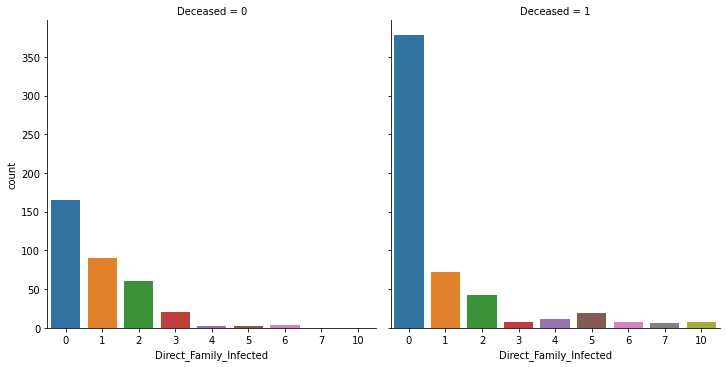

In [38]:
#Infected  with less relatives have a higher deceased rate than those infected with more relatives
#sns.countplot(x='Direct_Family_Infected', hue='Deceased', data=df)
#sns.barplot(x='Deceased', y='Direct_Family_Infected', data=df)

sns.factorplot(x='Direct_Family_Infected',col='Deceased', kind='count', data=number_fam)

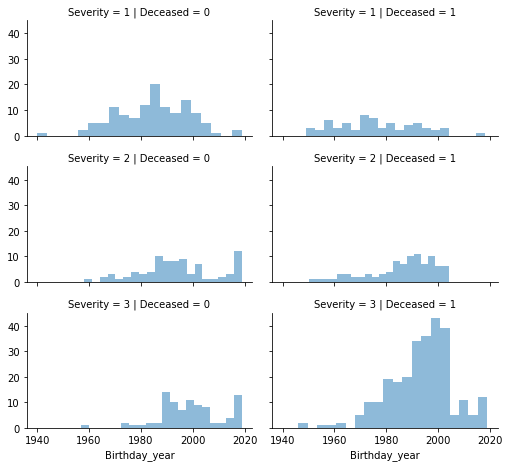

In [39]:
grid = sns.FacetGrid(train_data, col='Deceased', row='Severity', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Birthday_year', alpha=.5, bins=20)
grid.add_legend();

<AxesSubplot:xlabel='Severity', ylabel='Birthday_year'>

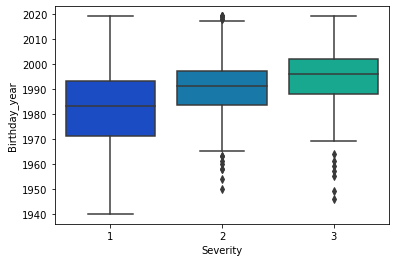

In [40]:
sns.boxplot(x='Severity',y='Birthday_year',data=train_data, palette='winter')

In [41]:
train02 = train_data.copy()

### <font color='#ecab97'>Data Distribution and Outliers</font> <a class="anchor" id="second-bullet"></a>

In [42]:
train_num = train02[['Birthday_year','Parents_Children_Infected','Partner_Siblings_Infected','Medical_Expenses_Family']].copy()

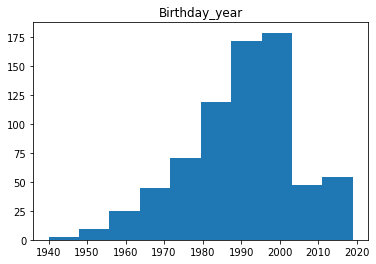

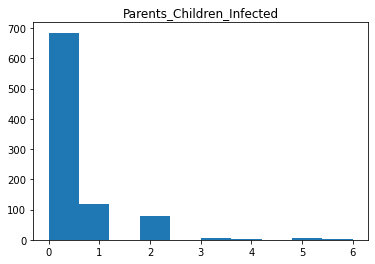

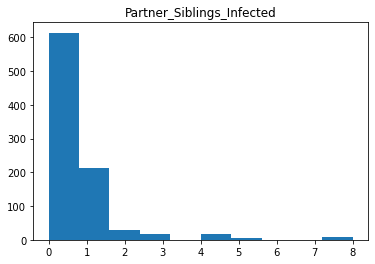

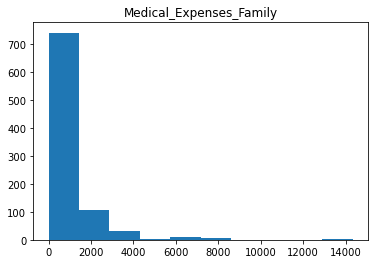

In [43]:
# histogram plot for training
from matplotlib import pyplot

for column in (train_num.columns):
    plt.hist(train_num[column])
    plt.title(column)
    plt.show()

(900, 4)

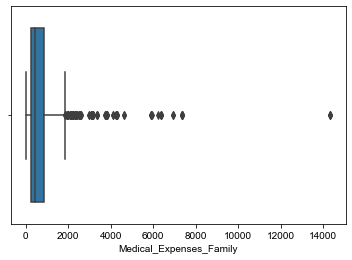

In [44]:
sns.boxplot(x='Medical_Expenses_Family', data = train_num)
sns.set(rc={'figure.figsize':(5,8)})
train_num.shape

(900, 4)

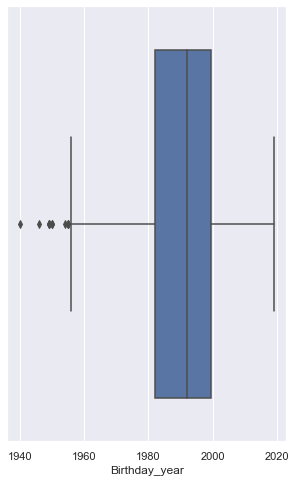

In [45]:
sns.boxplot(x='Birthday_year', data = train_num)
train_num.shape

<AxesSubplot:>

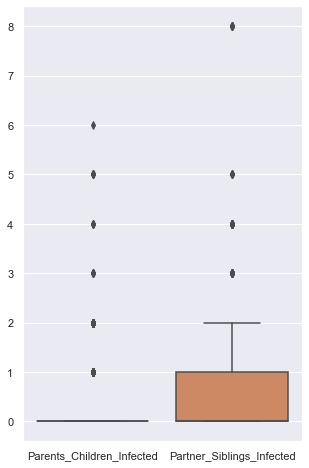

In [46]:
sns.boxplot(data = train02[['Parents_Children_Infected','Partner_Siblings_Infected']])

In [47]:
#removing rows with the values > than ...
train02 = train02[(train02['Medical_Expenses_Family'] < 7000)]
                   #& (X_train['Parents_Children_Infected'] < 5)&(X_train['Partner_Siblings_Infected'] < 8)

In [48]:
train02.isna().sum()

Patient_ID                     0
Family_Case_ID                 0
Severity                       0
Name                           0
Birthday_year                177
Parents_Children_Infected      0
Partner_Siblings_Infected      0
Medical_Expenses_Family        0
Medical_Tent                   0
City                           2
Deceased                       0
dtype: int64

In [49]:
train02 = train02.set_index('Patient_ID')

# <font color='#6593a4'>Train-Validation Split</font> <a class="anchor" id="second-bullet"></a> 

In [50]:
!pip install scikit-learn

In [51]:
data = train_data.drop(['Deceased'], axis=1)
target = train_data['Deceased']

In [52]:
#To use the dataset withour outliers --- train02

X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2, 
                                                  stratify = target, 
                                                  random_state = 2)

### <font color='#ecab97'>Missing values</font> <a class="anchor" id="second-bullet"></a>

In [53]:
X_train.isna().sum()

Patient_ID                     0
Family_Case_ID                 0
Severity                       0
Name                           0
Birthday_year                141
Parents_Children_Infected      0
Partner_Siblings_Infected      0
Medical_Expenses_Family        0
Medical_Tent                   0
City                           2
dtype: int64

In [54]:
X_val.isna().sum()

Patient_ID                    0
Family_Case_ID                0
Severity                      0
Name                          0
Birthday_year                36
Parents_Children_Infected     0
Partner_Siblings_Infected     0
Medical_Expenses_Family       0
Medical_Tent                  0
City                          0
dtype: int64

In [55]:
#locate the nulls in the city attribute
print(X_train[X_train['City'].isnull()])
print('---------ValidationSet-----------')
print(X_val[X_val['City'].isnull()])

     Patient_ID  Family_Case_ID  Severity                Name  Birthday_year  \
49           50           23155         1  Ms. Elizabeth Teri         1958.0   
530         531           23155         1  Ms. Tricia Kathryn         1982.0   

     Parents_Children_Infected  Partner_Siblings_Infected  \
49                           0                          0   
530                          0                          0   

     Medical_Expenses_Family Medical_Tent City  
49                      2240            B  NaN  
530                     2240            B  NaN  
---------ValidationSet-----------
Empty DataFrame
Columns: [Patient_ID, Family_Case_ID, Severity, Name, Birthday_year, Parents_Children_Infected, Partner_Siblings_Infected, Medical_Expenses_Family, Medical_Tent, City]
Index: []


In [56]:
# .iloc() ---> selecting data by row numbers
# .loc() ---> selecting data by label or by a conditional statement

# iloc: Multiple columns and rows can be selected together using the .iloc[] indexer.
## iloc returns: a Pandas Series when one row is selected{DataFrame.iloc[0]}, 
## and a Pandas DataFrame when multiple rows are selected {series.iloc},or if any column in full is selected

X_train['City'].fillna(X_train['City'].mode().iloc[0], inplace=True)
#X_val['City'].fillna(X_val['City'].mode().iloc[0], inplace=True) - no missing values for validation

In [57]:
X_train.isna().sum()

Patient_ID                     0
Family_Case_ID                 0
Severity                       0
Name                           0
Birthday_year                141
Parents_Children_Infected      0
Partner_Siblings_Infected      0
Medical_Expenses_Family        0
Medical_Tent                   0
City                           0
dtype: int64

In [58]:
X_train.set_index('Patient_ID')
X_val.set_index('Patient_ID')
test.set_index('Patient_ID')

,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City
Patient_ID,,,,,,,,,
901,49242,3,Mr. Jody Pedro,NaN,0,0,203,U,Santa Fe
902,10400,3,Mr. Kevin Brent,1988.0,0,0,631,U,Santa Fe
903,10795,3,Mr. Frankie Cary,1981.0,1,0,376,U,Albuquerque
904,62440,3,Mr. Rick Pete,NaN,0,1,405,U,Albuquerque
905,81311,2,Mr. Matthew Erick,1996.0,0,0,378,U,Santa Fe
...,...,...,...,...,...,...,...,...,...
1296,110522,3,Mr. Luther Rogelio,NaN,0,0,221,U,Santa Fe
1297,118768,3,Mr. Emanuel Ruben,NaN,0,0,202,U,Albuquerque
1298,86158,1,Mrs. Misty Camille,1994.0,0,1,3830,C,Albuquerque


In [59]:
X_train_MV = X_train.copy()
X_train_MV[['Title','First Name','Last Name']]= X_train_MV['Name'].str.split(expand=True)
X_train_MV['Gender'] = ['F' if x=='Miss' or x=='Ms.' else 'M' for x in X_train_MV['Title']]

X_val_MV = X_val.copy()
X_val_MV[['Title','First Name','Last Name']]= X_val_MV['Name'].str.split(expand=True)
X_val_MV['Gender'] = ['F' if x=='Miss' or x=='Ms.' else 'M' for x in X_val_MV['Title']]

test_MV = test.copy()
test_MV[['Title','First Name','Last Name']]= test_MV['Name'].str.split(expand=True)
test_MV['Gender'] = ['F' if x=='Miss' or x=='Ms.' else 'M' for x in test_MV['Title']]

In [60]:
X_train_MV

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Title,First Name,Last Name,Gender
832,833,2828,3,Ms. Joanna Jeanette,1997.0,0,0,222,U,Santa Fe,Ms.,Joanna,Jeanette,F
434,435,15734,2,Ms. Pearl Lora,1992.0,0,1,728,U,Santa Fe,Ms.,Pearl,Lora,F
692,693,21188,2,Mr. Lewis Bryant,2002.0,0,0,2058,U,Santa Fe,Mr.,Lewis,Bryant,M
780,781,14997,2,Ms. Geraldine Janie,1990.0,0,3,588,U,Santa Fe,Ms.,Geraldine,Janie,F
203,204,4459,3,Mr. Gregg Johnny,1998.0,0,0,218,U,Santa Fe,Mr.,Gregg,Johnny,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,160,23302,2,Mr. Darrel Eduardo,1992.0,0,0,364,U,Santa Fe,Mr.,Darrel,Eduardo,M
638,639,13911,3,Ms. Jody Belinda,1999.0,0,0,217,U,Taos,Ms.,Jody,Belinda,F
301,302,21375,3,Ms. Dora Miranda,1998.0,0,0,218,U,Santa Fe,Ms.,Dora,Miranda,F
867,868,23426,3,Mr. Calvin Dale,1980.0,4,1,781,U,Santa Fe,Mr.,Calvin,Dale,M


In [61]:
def one_hot_encode(data_frame, column_name):
    dummies = pd.get_dummies(data_frame[column_name],prefix=column_name, drop_first = True) 
    data_frame = pd.concat([data_frame,dummies],axis=1)
    data_frame.drop(labels=[column_name], axis=1, inplace=True)
    return data_frame

city_dum = one_hot_encode(X_train_MV, "City")
gender_dum = one_hot_encode(city_dum, "Gender")
tent_dum = one_hot_encode(gender_dum, "Medical_Tent")
X_train_MV = one_hot_encode(tent_dum, "Title")

val_city_dum = one_hot_encode(X_val_MV, "City")
val_gender_dum = one_hot_encode(val_city_dum, "Gender")
val_tent_dum = one_hot_encode(val_gender_dum, "Medical_Tent")
X_val_MV = one_hot_encode(val_tent_dum, "Title")

test_city_dum = one_hot_encode(test_MV, "City")
test_gender_dum = one_hot_encode(test_city_dum, "Gender")
test_tent_dum = one_hot_encode(test_gender_dum, "Medical_Tent")
test_MV = one_hot_encode(test_tent_dum, "Title")


In [62]:
X_train_MV

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,First Name,Last Name,...,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Title_Miss,Title_Mr.,Title_Ms.
832,833,2828,3,Ms. Joanna Jeanette,1997.0,0,0,222,Joanna,Jeanette,...,0,0,0,0,0,0,1,0,0,1
434,435,15734,2,Ms. Pearl Lora,1992.0,0,1,728,Pearl,Lora,...,0,0,0,0,0,0,1,0,0,1
692,693,21188,2,Mr. Lewis Bryant,2002.0,0,0,2058,Lewis,Bryant,...,0,0,0,0,0,0,1,0,1,0
780,781,14997,2,Ms. Geraldine Janie,1990.0,0,3,588,Geraldine,Janie,...,0,0,0,0,0,0,1,0,0,1
203,204,4459,3,Mr. Gregg Johnny,1998.0,0,0,218,Gregg,Johnny,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,160,23302,2,Mr. Darrel Eduardo,1992.0,0,0,364,Darrel,Eduardo,...,0,0,0,0,0,0,1,0,1,0
638,639,13911,3,Ms. Jody Belinda,1999.0,0,0,217,Jody,Belinda,...,0,0,0,0,0,0,1,0,0,1
301,302,21375,3,Ms. Dora Miranda,1998.0,0,0,218,Dora,Miranda,...,0,0,0,0,0,0,1,0,0,1
867,868,23426,3,Mr. Calvin Dale,1980.0,4,1,781,Calvin,Dale,...,0,0,0,0,0,0,1,0,1,0


In [63]:
X_train_MV = X_train_MV.drop(labels=['Family_Case_ID','Name','First Name','Last Name'],axis=1)
X_val_MV = X_val_MV.drop(labels=['Family_Case_ID','Name','First Name','Last Name'],axis=1)
test_MV = test_MV.drop(labels=['Family_Case_ID','Name','First Name','Last Name'],axis=1)

In [64]:
X_train_MV

,Patient_ID,Severity,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,City_Santa Fe,City_Taos,Gender_M,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Title_Miss,Title_Mr.,Title_Ms.
832,833,3,1997.0,0,0,222,1,0,0,0,0,0,0,0,0,1,0,0,1
434,435,2,1992.0,0,1,728,1,0,0,0,0,0,0,0,0,1,0,0,1
692,693,2,2002.0,0,0,2058,1,0,1,0,0,0,0,0,0,1,0,1,0
780,781,2,1990.0,0,3,588,1,0,0,0,0,0,0,0,0,1,0,0,1
203,204,3,1998.0,0,0,218,1,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,160,2,1992.0,0,0,364,1,0,1,0,0,0,0,0,0,1,0,1,0
638,639,3,1999.0,0,0,217,0,1,0,0,0,0,0,0,0,1,0,0,1
301,302,3,1998.0,0,0,218,1,0,0,0,0,0,0,0,0,1,0,0,1
867,868,3,1980.0,4,1,781,1,0,1,0,0,0,0,0,0,1,0,1,0


In [65]:
minmaxscaler = MinMaxScaler()

X_train_MV = pd.DataFrame(minmaxscaler.fit_transform(X_train_MV), columns = X_train_MV.columns, index = X_train.index)
X_val_MV = pd.DataFrame(minmaxscaler.transform(X_val_MV), columns = X_val_MV.columns, index = X_val.index)
test_MV = pd.DataFrame(minmaxscaler.transform(test_MV), columns = test_MV.columns, index = test.index)

In [66]:
imputer = KNNImputer(n_neighbors=10)

In [67]:
imputed = imputer.fit_transform(X_train_MV)
imputed_val = imputer.transform(X_val_MV)
imputed_test = imputer.transform(test_MV)

X_train_MV = pd.DataFrame(imputed, columns = X_train_MV.columns, index = X_train.index)
X_val_MV = pd.DataFrame(imputed_val, columns = X_val_MV.columns, index = X_val.index)
test_MV = pd.DataFrame(imputed_test, columns = test_MV.columns, index = test.index)

In [68]:
X_train_MV

,Patient_ID,Severity,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,City_Santa Fe,City_Taos,Gender_M,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Title_Miss,Title_Mr.,Title_Ms.
832,0.926503,1.0,0.721519,0.0,0.000,0.015476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
434,0.483296,0.5,0.658228,0.0,0.125,0.050749,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
692,0.770601,0.5,0.784810,0.0,0.000,0.143465,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
780,0.868597,0.5,0.632911,0.0,0.375,0.040990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
203,0.226058,1.0,0.734177,0.0,0.000,0.015197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.177060,0.5,0.658228,0.0,0.000,0.025375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
638,0.710468,1.0,0.746835,0.0,0.000,0.015127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
301,0.335189,1.0,0.734177,0.0,0.000,0.015197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
867,0.965479,1.0,0.506329,0.8,0.125,0.054444,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [69]:
print(X_train_MV.isna().sum())
print('---Missing Values - Validation---')
print(X_val_MV.isna().sum())
print('------Missing Values - Test---')
print(test_MV.isna().sum())

Patient_ID                   0
Severity                     0
Birthday_year                0
Parents_Children_Infected    0
Partner_Siblings_Infected    0
Medical_Expenses_Family      0
City_Santa Fe                0
City_Taos                    0
Gender_M                     0
Medical_Tent_B               0
Medical_Tent_C               0
Medical_Tent_D               0
Medical_Tent_E               0
Medical_Tent_F               0
Medical_Tent_G               0
Medical_Tent_U               0
Title_Miss                   0
Title_Mr.                    0
Title_Ms.                    0
dtype: int64
---Missing Values - Validation---
Patient_ID                   0
Severity                     0
Birthday_year                0
Parents_Children_Infected    0
Partner_Siblings_Infected    0
Medical_Expenses_Family      0
City_Santa Fe                0
City_Taos                    0
Gender_M                     0
Medical_Tent_B               0
Medical_Tent_C               0
Medical_Tent_D         

In [70]:
X_train_MV

,Patient_ID,Severity,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,City_Santa Fe,City_Taos,Gender_M,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Title_Miss,Title_Mr.,Title_Ms.
832,0.926503,1.0,0.721519,0.0,0.000,0.015476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
434,0.483296,0.5,0.658228,0.0,0.125,0.050749,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
692,0.770601,0.5,0.784810,0.0,0.000,0.143465,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
780,0.868597,0.5,0.632911,0.0,0.375,0.040990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
203,0.226058,1.0,0.734177,0.0,0.000,0.015197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.177060,0.5,0.658228,0.0,0.000,0.025375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
638,0.710468,1.0,0.746835,0.0,0.000,0.015127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
301,0.335189,1.0,0.734177,0.0,0.000,0.015197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
867,0.965479,1.0,0.506329,0.8,0.125,0.054444,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [71]:
# Invert the normalized data, to its original data forms
X_train_MV = pd.DataFrame(minmaxscaler.inverse_transform(X_train_MV), columns = X_train_MV.columns, index = X_train.index)
X_val_MV = pd.DataFrame(minmaxscaler.inverse_transform(X_val_MV), columns = X_val_MV.columns, index = X_val.index)
test_MV = pd.DataFrame(minmaxscaler.inverse_transform(test_MV), columns = test_MV.columns, index = test.index)

In [72]:
X_train_MV['Birthday_year'] = X_train_MV['Birthday_year'].astype(int)
X_val_MV['Birthday_year'] = X_val_MV['Birthday_year'].astype(int)
test_MV['Birthday_year'] = test_MV['Birthday_year'].astype(int)

In [73]:
X_train['Birthday_year'] = X_train_MV['Birthday_year']
X_val['Birthday_year'] = X_val_MV['Birthday_year']
test['Birthday_year'] = test_MV['Birthday_year']

In [74]:
X_val

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City
766,767,19405,3,Master Brett Tony,2008,0,0,221,U,Santa Fe
890,891,1907,1,Mr. Ronnie Hugo,1992,0,0,743,C,Santa Fe
325,326,14413,1,Mr. Tim Elbert,1969,0,1,1565,E,Santa Fe
541,542,3409,3,Mr. Jordan Shannon,1992,0,0,220,U,Santa Fe
579,580,19075,2,Mr. Jared Frederick,1995,0,0,364,U,Santa Fe
...,...,...,...,...,...,...,...,...,...,...
38,39,18084,3,Mr. Gerard Austin,1987,0,0,218,U,Santa Fe
87,88,4680,1,Ms. Nicole Heidi,1996,2,3,7364,C,Santa Fe
275,276,5625,1,Mr. Lonnie Don,1959,0,0,938,B,Santa Fe
355,356,13324,3,Miss Mattie Lora,2004,0,1,434,U,Taos


In [75]:
X_train = X_train.set_index('Patient_ID')
X_val = X_val.set_index('Patient_ID')
test = test.set_index('Patient_ID')

In [76]:
X_train

,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City
Patient_ID,,,,,,,,,
833,2828,3,Ms. Joanna Jeanette,1996,0,0,222,U,Santa Fe
435,15734,2,Ms. Pearl Lora,1992,0,1,728,U,Santa Fe
693,21188,2,Mr. Lewis Bryant,2002,0,0,2058,U,Santa Fe
781,14997,2,Ms. Geraldine Janie,1990,0,3,588,U,Santa Fe
204,4459,3,Mr. Gregg Johnny,1998,0,0,218,U,Santa Fe
...,...,...,...,...,...,...,...,...,...
160,23302,2,Mr. Darrel Eduardo,1992,0,0,364,U,Santa Fe
639,13911,3,Ms. Jody Belinda,1998,0,0,217,U,Taos
302,21375,3,Ms. Dora Miranda,1998,0,0,218,U,Santa Fe


### <font color='#ecab97'>Feature Engineering</font> <a class="anchor" id="second-bullet"></a>

In [77]:
from datetime import date

X_train['Age'] = date.today().year - X_train['Birthday_year']
X_train.drop(labels=['Birthday_year'],axis=1,inplace=True)

X_val['Age'] = date.today().year - X_val['Birthday_year']
X_val.drop(labels=['Birthday_year'],axis=1,inplace=True)

test['Age'] = date.today().year - test['Birthday_year']
test.drop(labels=['Birthday_year'],axis=1,inplace=True)
test

,Family_Case_ID,Severity,Name,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Age
Patient_ID,,,,,,,,,
901,49242,3,Mr. Jody Pedro,0,0,203,U,Santa Fe,32
902,10400,3,Mr. Kevin Brent,0,0,631,U,Santa Fe,33
903,10795,3,Mr. Frankie Cary,1,0,376,U,Albuquerque,40
904,62440,3,Mr. Rick Pete,0,1,405,U,Albuquerque,31
905,81311,2,Mr. Matthew Erick,0,0,378,U,Santa Fe,25
...,...,...,...,...,...,...,...,...,...
1296,110522,3,Mr. Luther Rogelio,0,0,221,U,Santa Fe,32
1297,118768,3,Mr. Emanuel Ruben,0,0,202,U,Albuquerque,31
1298,86158,1,Mrs. Misty Camille,0,1,3830,C,Albuquerque,27


In [78]:
fam = pd.DataFrame(X_train[['Family_Case_ID']].value_counts())
fam['counts'] = X_train[['Family_Case_ID']].value_counts()

In [79]:
fam = fam.reset_index()
fam

,Family_Case_ID,0,counts
0,20586,7,7
1,23426,6,6
2,14502,6,6
3,10262,5,5
4,18593,4,4
...,...,...,...
560,16295,1,1
561,16312,1,1
562,16385,1,1
563,16470,1,1


In [80]:
X_train['Family_Members_Infected'] = 0

for index, row in X_train.iterrows():
    c = fam.loc[fam['Family_Case_ID'] == row['Family_Case_ID']]
    if not c.empty:
        X_train.at[index, 'Family_Members_Infected'] = c['counts']


In [81]:
X_val['Family_Members_Infected'] = 0

for index, row in X_val.iterrows():
    c = fam.loc[fam['Family_Case_ID'] == row['Family_Case_ID']]
    if not c.empty:
        X_val.at[index, 'Family_Members_Infected'] = c['counts']
    else:
        X_val.at[index, 'Family_Members_Infected'] = 1

In [82]:
test['Family_Members_Infected'] = 0

for index, row in test.iterrows():
    c = fam.loc[fam['Family_Case_ID'] == row['Family_Case_ID']]
    if not c.empty:
        test.at[index, 'Family_Members_Infected'] = c['counts']
    else:
        test.at[index, 'Family_Members_Infected'] = 1

In [83]:
#apply() method takes the array of arguments

#X_train['Family_Members_Infected'] = X_train['Family_Case_ID'].apply(lambda x : fam01[x])
#X_val['Family_Members_Infected'] = X_val['Family_Case_ID'].apply(lambda x : fam02[x])

In [84]:
# Sum the columns regarding the direct familiy
X_train['Direct_Family_Infected'] = X_train['Parents_Children_Infected'] + X_train['Partner_Siblings_Infected']
X_train.drop(labels = ['Parents_Children_Infected','Partner_Siblings_Infected'], axis=1, inplace=True)

X_val['Direct_Family_Infected'] = X_val['Parents_Children_Infected'] + X_val['Partner_Siblings_Infected']
X_val.drop(labels = ['Parents_Children_Infected','Partner_Siblings_Infected'], axis=1, inplace=True)

test['Direct_Family_Infected'] = test['Parents_Children_Infected'] + test['Partner_Siblings_Infected']
test.drop(labels = ['Parents_Children_Infected','Partner_Siblings_Infected'], axis=1, inplace=True)

In [85]:
#To check if its working properly ## 18593
X_train.loc[X_train['Family_Case_ID'] == 14502]

,Family_Case_ID,Severity,Name,Medical_Expenses_Family,Medical_Tent,City,Age,Family_Members_Infected,Direct_Family_Infected
Patient_ID,,,,,,,,,
317,14502,3,Master Wilson Sheldon,1947,U,Santa Fe,10,6,10
855,14502,3,Master Randall Angel,1947,U,Santa Fe,8,6,10
597,14502,3,Miss Rachel Teri,1947,U,Santa Fe,7,6,10
230,14502,3,Miss Hazel Esther,1947,U,Santa Fe,7,6,10
37,14502,3,Master Elijah Devin,1947,U,Santa Fe,10,6,10
596,14502,3,Master Brent Jordan,1947,U,Santa Fe,9,6,10


In [86]:
X_val.loc[X_val['Family_Case_ID'] == 14502]

,Family_Case_ID,Severity,Name,Medical_Expenses_Family,Medical_Tent,City,Age,Family_Members_Infected,Direct_Family_Infected
Patient_ID,,,,,,,,,
41,14502,3,Miss Kim Elizabeth,1947,U,Santa Fe,7,6,10


In [87]:
test.loc[test['Family_Case_ID'] == 14502]

,Family_Case_ID,Severity,Name,Medical_Expenses_Family,Medical_Tent,City,Age,Family_Members_Infected,Direct_Family_Infected
Patient_ID,,,,,,,,,
968,14502,3,Master Willie Pat,1947,U,Santa Fe,16,6,10
977,14502,3,Mr. Kenny Clinton,1947,U,Santa Fe,37,6,10
1079,14502,3,Mrs. Rebecca Jessica,1947,U,Santa Fe,18,6,10
1159,14502,3,Mrs. Juana Lillie,1947,U,Santa Fe,34,6,10


In [88]:
# ---Divide Family Medical Expenses per number of 'Direct_Family_Infected' 
# -- to know the Medical_Expenses_Person/ per person/ per household

X_train['Number_Direct_Family'] = X_train['Direct_Family_Infected']
X_train['Number_Direct_Family'].replace(to_replace = 0 ,value = 1, inplace = True)

X_val['Number_Direct_Family'] = X_val['Direct_Family_Infected']
X_val['Number_Direct_Family'].replace(to_replace = 0 ,value = 1, inplace = True)

test['Number_Direct_Family'] = test['Direct_Family_Infected']
test['Number_Direct_Family'].replace(to_replace = 0 ,value = 1, inplace = True)

In [89]:
X_train['Medical_Expenses_Person'] = X_train['Medical_Expenses_Family'] / X_train['Number_Direct_Family']
X_val['Medical_Expenses_Person'] = X_val['Medical_Expenses_Family'] / X_val['Number_Direct_Family']
test['Medical_Expenses_Person'] = test['Medical_Expenses_Family'] / test['Number_Direct_Family']       

In [90]:
X_train[['Title','First Name','Last Name']]= X_train['Name'].str.split(expand=True)
X_train['Gender'] = ['F' if x=='Miss' or x=='Ms.' else 'M' for x in X_train['Title']]

X_val[['Title','First Name','Last Name']]= X_val['Name'].str.split(expand=True)
X_val['Gender'] = ['F' if x=='Miss' or x=='Ms.' else 'M' for x in X_val['Title']]

test[['Title','First Name','Last Name']]= test['Name'].str.split(expand=True)
test['Gender'] = ['F' if x=='Miss' or x=='Ms.' else 'M' for x in test['Title']]
test

,Family_Case_ID,Severity,Name,Medical_Expenses_Family,Medical_Tent,City,Age,Family_Members_Infected,Direct_Family_Infected,Number_Direct_Family,Medical_Expenses_Person,Title,First Name,Last Name,Gender
Patient_ID,,,,,,,,,,,,,,,
901,49242,3,Mr. Jody Pedro,203,U,Santa Fe,32,1,0,1,203.0,Mr.,Jody,Pedro,M
902,10400,3,Mr. Kevin Brent,631,U,Santa Fe,33,1,0,1,631.0,Mr.,Kevin,Brent,M
903,10795,3,Mr. Frankie Cary,376,U,Albuquerque,40,1,1,1,376.0,Mr.,Frankie,Cary,M
904,62440,3,Mr. Rick Pete,405,U,Albuquerque,31,1,1,1,405.0,Mr.,Rick,Pete,M
905,81311,2,Mr. Matthew Erick,378,U,Santa Fe,25,1,0,1,378.0,Mr.,Matthew,Erick,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,110522,3,Mr. Luther Rogelio,221,U,Santa Fe,32,1,0,1,221.0,Mr.,Luther,Rogelio,M
1297,118768,3,Mr. Emanuel Ruben,202,U,Albuquerque,31,1,0,1,202.0,Mr.,Emanuel,Ruben,M
1298,86158,1,Mrs. Misty Camille,3830,C,Albuquerque,27,1,1,1,3830.0,Mrs.,Misty,Camille,M


In [91]:
data_sets = [X_train, X_val, test]

for dataset in data_sets:
    dataset['Medical_Expenses_Person'] = dataset['Medical_Expenses_Person'].astype(int)

In [92]:
#data_sets = [X_train, X_val, test]

#for dataset in data_sets:
#    dataset['Has_Family_Infected?'] = dataset['Direct_Family_Infected']
#    dataset.loc[dataset['Direct_Family_Infected'] > 0, 'Has_Family_Infected?'] = 1  #Has Direct_Family_Infected
#    dataset.loc[dataset['Direct_Family_Infected'] == 0, 'Has_Family_Infected?'] = 0 ## Does NOT have Direct_Family_Infected
#    dataset['Has_Family_Infected?'] = dataset['Has_Family_Infected?'].astype(int)

In [93]:
X_train['Medical_Tent'].value_counts()

U    562
C     46
B     43
E     22
D     21
A     11
F     11
G      4
Name: Medical_Tent, dtype: int64

In [94]:
#data_sets = [X_train, X_val, test]

#for dataset in data_sets:
#    dataset['Lodged_In_Tent'] = dataset['Medical_Tent']
#    dataset.loc[dataset['Lodged_In_Tent'] == 'U', 'Lodged_In_Tent'] = 'NO' ## Does NOT Medical_Tent Assigned
#    dataset.loc[dataset['Lodged_In_Tent'] == 'A', 'Lodged_In_Tent'] = 'YES'  #Has Medical_Tent Assigned
#    dataset.loc[dataset['Lodged_In_Tent'] == 'B', 'Lodged_In_Tent'] = 'YES'  #Has Medical_Tent Assigned
#    dataset.loc[dataset['Lodged_In_Tent'] == 'C', 'Lodged_In_Tent'] = 'YES'  #Has Medical_Tent Assigned
#    dataset.loc[dataset['Lodged_In_Tent'] == 'D', 'Lodged_In_Tent'] = 'YES'  #Has Medical_Tent Assigned
#    dataset.loc[dataset['Lodged_In_Tent'] == 'E', 'Lodged_In_Tent'] = 'YES'  #Has Medical_Tent Assigned
#    dataset.loc[dataset['Lodged_In_Tent'] == 'F', 'Lodged_In_Tent'] = 'YES'  #Has Medical_Tent Assigned
#    dataset.loc[dataset['Lodged_In_Tent'] == 'G', 'Lodged_In_Tent'] = 'YES'  #Has Medical_Tent Assigned

#X_train['Lodged_In_Tent'].value_counts()

In [95]:
X_train

,Family_Case_ID,Severity,Name,Medical_Expenses_Family,Medical_Tent,City,Age,Family_Members_Infected,Direct_Family_Infected,Number_Direct_Family,Medical_Expenses_Person,Title,First Name,Last Name,Gender
Patient_ID,,,,,,,,,,,,,,,
833,2828,3,Ms. Joanna Jeanette,222,U,Santa Fe,25,1,0,1,222,Ms.,Joanna,Jeanette,F
435,15734,2,Ms. Pearl Lora,728,U,Santa Fe,29,1,1,1,728,Ms.,Pearl,Lora,F
693,21188,2,Mr. Lewis Bryant,2058,U,Santa Fe,19,4,0,1,2058,Mr.,Lewis,Bryant,M
781,14997,2,Ms. Geraldine Janie,588,U,Santa Fe,31,1,3,3,196,Ms.,Geraldine,Janie,F
204,4459,3,Mr. Gregg Johnny,218,U,Santa Fe,23,1,0,1,218,Mr.,Gregg,Johnny,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,23302,2,Mr. Darrel Eduardo,364,U,Santa Fe,29,1,0,1,364,Mr.,Darrel,Eduardo,M
639,13911,3,Ms. Jody Belinda,217,U,Taos,23,1,0,1,217,Ms.,Jody,Belinda,F
302,21375,3,Ms. Dora Miranda,218,U,Santa Fe,23,1,0,1,218,Ms.,Dora,Miranda,F


In [96]:
def one_hot_encode(data_frame, column_name):
    dummies = pd.get_dummies(data_frame[column_name],prefix=column_name, drop_first = True) 
    data_frame = pd.concat([data_frame,dummies],axis=1)
    data_frame.drop(labels=[column_name], axis=1, inplace=True)
    return data_frame
#train set
city_dummies = one_hot_encode(X_train, "City")
tent_dummies = one_hot_encode(city_dummies, "Medical_Tent")
X_train = one_hot_encode(tent_dummies, "Gender")

#val set
X_val_city_dummies = one_hot_encode(X_val, "City")
X_val_tent_dummies = one_hot_encode(X_val_city_dummies, "Medical_Tent")
X_val = one_hot_encode(X_val_tent_dummies, "Gender")

test_city_dummies = one_hot_encode(test, "City")
test_tent_dummies = one_hot_encode(test_city_dummies, "Medical_Tent")
test = one_hot_encode(test_tent_dummies, "Gender")

In [97]:
X_train = X_train.drop(labels=['Name','Title','First Name','Last Name','Number_Direct_Family','Medical_Expenses_Family'],axis=1)

X_val = X_val.drop(labels=['Name','Title','First Name','Last Name','Number_Direct_Family','Medical_Expenses_Family'],axis=1)

test = test.drop(labels=['Name','Title','First Name','Last Name','Number_Direct_Family','Medical_Expenses_Family'],axis=1)

In [98]:
X_train

,Family_Case_ID,Severity,Age,Family_Members_Infected,Direct_Family_Infected,Medical_Expenses_Person,City_Santa Fe,City_Taos,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Gender_M
Patient_ID,,,,,,,,,,,,,,,,
833,2828,3,25,1,0,222,1,0,0,0,0,0,0,0,1,0
435,15734,2,29,1,1,728,1,0,0,0,0,0,0,0,1,0
693,21188,2,19,4,0,2058,1,0,0,0,0,0,0,0,1,1
781,14997,2,31,1,3,196,1,0,0,0,0,0,0,0,1,0
204,4459,3,23,1,0,218,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,23302,2,29,1,0,364,1,0,0,0,0,0,0,0,1,1
639,13911,3,23,1,0,217,0,1,0,0,0,0,0,0,1,0
302,21375,3,23,1,0,218,1,0,0,0,0,0,0,0,1,0


In [99]:
#X_train = X_train.drop(labels=['Direct_Family_Infected'],axis=1)
#X_val = X_val.drop(labels=['Direct_Family_Infected'],axis=1)
#test = test.drop(labels=['Direct_Family_Infected'],axis=1)

In [100]:
# -------- Variables (preprocessed) for FINAL model (NOT NORMALIZED) with 'Family_Case_ID' --------------

X_train_Final = X_train.copy()
X_val_Final = X_val.copy()
X_test = test.copy()

y_train_Final = y_train.copy()
y_val_Final = y_val.copy()

In [101]:
X_train = X_train.drop(labels=['Family_Case_ID'],axis=1)
X_val = X_val.drop(labels=['Family_Case_ID'],axis=1)
test = test.drop(labels=['Family_Case_ID'],axis=1)

In [102]:
X_train

,Severity,Age,Family_Members_Infected,Direct_Family_Infected,Medical_Expenses_Person,City_Santa Fe,City_Taos,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Gender_M
Patient_ID,,,,,,,,,,,,,,,
833,3,25,1,0,222,1,0,0,0,0,0,0,0,1,0
435,2,29,1,1,728,1,0,0,0,0,0,0,0,1,0
693,2,19,4,0,2058,1,0,0,0,0,0,0,0,1,1
781,2,31,1,3,196,1,0,0,0,0,0,0,0,1,0
204,3,23,1,0,218,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2,29,1,0,364,1,0,0,0,0,0,0,0,1,1
639,3,23,1,0,217,0,1,0,0,0,0,0,0,1,0
302,3,23,1,0,218,1,0,0,0,0,0,0,0,1,0


In [103]:
X_val

,Severity,Age,Family_Members_Infected,Direct_Family_Infected,Medical_Expenses_Person,City_Santa Fe,City_Taos,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Gender_M
Patient_ID,,,,,,,,,,,,,,,
767,3,13,1,0,221,1,0,0,0,0,0,0,0,1,1
891,1,29,1,0,743,1,0,0,1,0,0,0,0,0,1
326,1,52,1,1,1565,1,0,0,0,0,1,0,0,0,1
542,3,29,1,0,220,1,0,0,0,0,0,0,0,1,1
580,2,26,1,0,364,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,3,34,1,0,218,1,0,0,0,0,0,0,0,1,1
88,1,25,2,5,1472,1,0,0,1,0,0,0,0,0,0
276,1,62,1,0,938,1,0,1,0,0,0,0,0,0,1


In [104]:
# Normalize the data

scaler02 = RobustScaler()

X_train = pd.DataFrame(scaler02.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_val = pd.DataFrame(scaler02.transform(X_val), columns = X_val.columns, index = X_val.index)
test = pd.DataFrame(scaler02.transform(test), columns = test.columns, index = test.index)

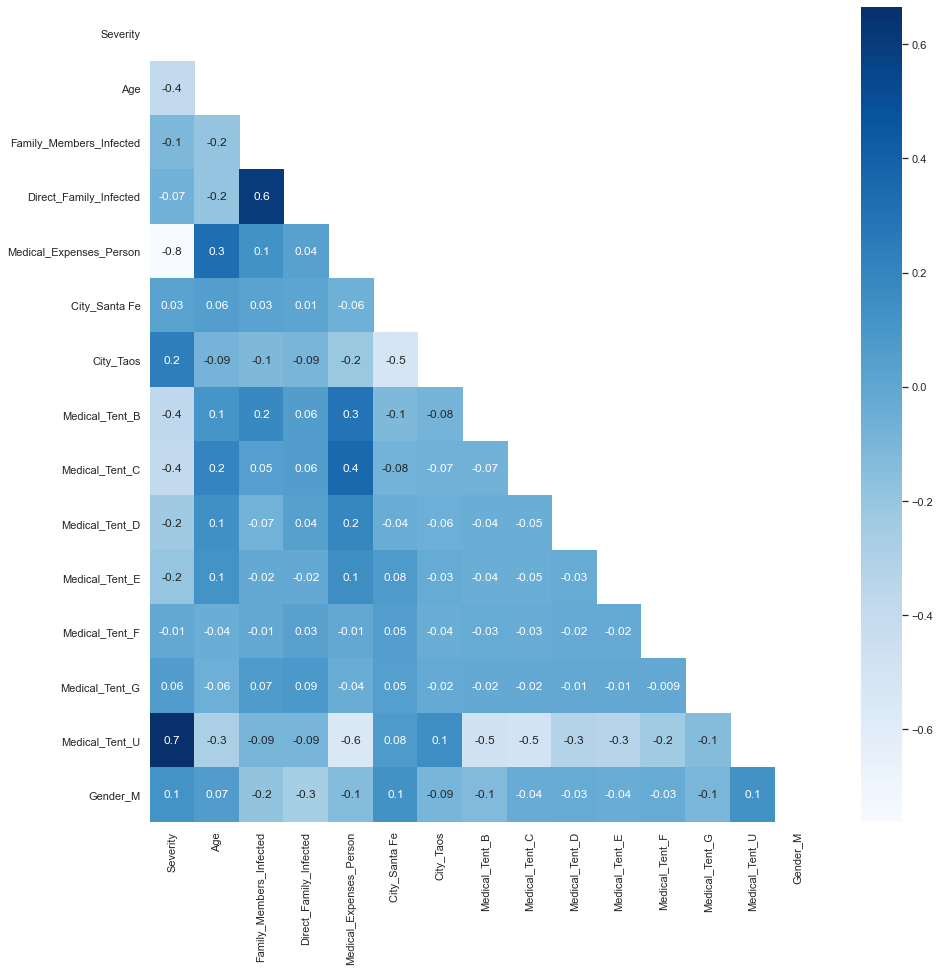

In [105]:
corr = X_train.corr(method= "spearman")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr, mask=mask,annot=True, fmt = '.1g', cmap= "Blues")

In [106]:
#telling you how much variance there is in the data in that direction, 
#in the example above the eigenvalue is a number telling us how spread out the data is on the line

from numpy import linalg
cor_mat1 = np.corrcoef(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
#print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
print("Variables:", X_train.columns)


Eigenvalues 
[3.0539021  1.98409634 1.62102385 0.03827618 0.2035014  0.27938002
 0.39700864 0.57516804 0.70390427 0.80672741 1.16745041 1.07401673
 1.01403291 1.0472968  1.03421488]
Variables: Index(['Severity', 'Age', 'Family_Members_Infected', 'Direct_Family_Infected',
       'Medical_Expenses_Person', 'City_Santa Fe', 'City_Taos',
       'Medical_Tent_B', 'Medical_Tent_C', 'Medical_Tent_D', 'Medical_Tent_E',
       'Medical_Tent_F', 'Medical_Tent_G', 'Medical_Tent_U', 'Gender_M'],
      dtype='object')


## <font color='#6593a4'>Over Sampling</font> <a class="anchor" id="second-bullet"></a>

In [107]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

#smt = SMOTETomek() #combination of over and under samplig

smote = SMOTETomek()
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [108]:
X_train_SMOTE

,Severity,Age,Family_Members_Infected,Direct_Family_Infected,Medical_Expenses_Person,City_Santa Fe,City_Taos,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Gender_M
0,-1.000000,0.166667,0.000000,1.000000,0.897260,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0
1,-1.000000,-0.388889,3.000000,0.000000,3.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.000000,0.277778,0.000000,3.000000,-0.143836,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.000000,-0.166667,0.000000,0.000000,-0.100783,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.000000,-0.166667,3.000000,2.000000,1.486301,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,-1.000000,0.413426,0.000000,1.000000,0.864764,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0
808,-1.134872,0.900769,0.000000,0.000000,0.410838,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0
809,-2.000000,1.539399,1.000000,1.000000,3.744618,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,-1.0,-1.0
810,-2.000000,0.872432,2.000000,0.039098,7.881605,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,-1.0,-1.0


In [109]:
y_train_SMOTE.value_counts()

1    406
0    406
Name: Deceased, dtype: int64

## <font color='#6593a4'>Feature Selection - Train and Validation sets</font> <a class="anchor" id="second-bullet"></a>

In [110]:
#Removing highly correlated variables > |0.8|

features_X_train = X_train.drop(['Medical_Expenses_Person'], axis=1)
features_X_val =  X_val.drop(['Medical_Expenses_Person'], axis=1)
features_X_train

,Severity,Age,Family_Members_Infected,Direct_Family_Infected,City_Santa Fe,City_Taos,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Gender_M
Patient_ID,,,,,,,,,,,,,,
833,0.0,-0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
435,-1.0,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
693,-1.0,-0.388889,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,-1.0,0.277778,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
204,0.0,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
639,0.0,-0.166667,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
302,0.0,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [111]:
#feature selection should be performed before sampling
#Using dataset oversampling

In [112]:
# Recursive Feature Elimination in LogisticRegression

model = LogisticRegression()
rfe = RFECV(model) 
X_rfe = rfe.fit_transform(features_X_train, y_train)
X_test_rfe = rfe.transform(features_X_val)
model.fit(X_rfe, y_train)

print("Optimal number of features: %d" % rfe.n_features_)
print("Attribute Ranking: %s" % rfe.ranking_)
print("Selected Variables: %s" % rfe.support_)
print("Predictor Variables:", features_X_train.columns)

Optimal number of features: 8
Attribute Ranking: [1 1 3 7 1 6 4 1 5 1 2 1 1 1]
Selected Variables: [ True  True False False  True False False  True False  True False  True
  True  True]
Predictor Variables: Index(['Severity', 'Age', 'Family_Members_Infected', 'Direct_Family_Infected',
       'City_Santa Fe', 'City_Taos', 'Medical_Tent_B', 'Medical_Tent_C',
       'Medical_Tent_D', 'Medical_Tent_E', 'Medical_Tent_F', 'Medical_Tent_G',
       'Medical_Tent_U', 'Gender_M'],
      dtype='object')


In [113]:
rferf = RFECV(RandomForestClassifier()) 
X_rferf = rferf.fit_transform(features_X_train, y_train)
X_test_rfe = rferf.transform(features_X_val)
model.fit(X_rferf, y_train)

print("Optimal number of features: %d" % rferf.n_features_)
print("Attribute Ranking: %s" % rferf.ranking_)
print("Selected Variables: %s" % rferf.support_)
print("Predictor Variables:", features_X_train.columns)

Optimal number of features: 4
Attribute Ranking: [ 1  1  2  1  4  7  6  8  9  5 10 11  3  1]
Selected Variables: [ True  True False  True False False False False False False False False
 False  True]
Predictor Variables: Index(['Severity', 'Age', 'Family_Members_Infected', 'Direct_Family_Infected',
       'City_Santa Fe', 'City_Taos', 'Medical_Tent_B', 'Medical_Tent_C',
       'Medical_Tent_D', 'Medical_Tent_E', 'Medical_Tent_F', 'Medical_Tent_G',
       'Medical_Tent_U', 'Gender_M'],
      dtype='object')


In [114]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

Feature 0: 86.590605
Feature 1: 0.406868
Feature 2: 0.297824
Feature 3: 0.070175
Feature 4: 15.077350
Feature 5: 0.124446
Feature 6: 29.111654
Feature 7: 8.437582
Feature 8: 7.235303
Feature 9: 14.560240
Feature 10: 2.955355
Feature 11: 0.219566
Feature 12: 76.413273
Feature 13: 251.013045
----------------------
Variables: Index(['Severity', 'Age', 'Family_Members_Infected', 'Direct_Family_Infected',
       'City_Santa Fe', 'City_Taos', 'Medical_Tent_B', 'Medical_Tent_C',
       'Medical_Tent_D', 'Medical_Tent_E', 'Medical_Tent_F', 'Medical_Tent_G',
       'Medical_Tent_U', 'Gender_M'],
      dtype='object')


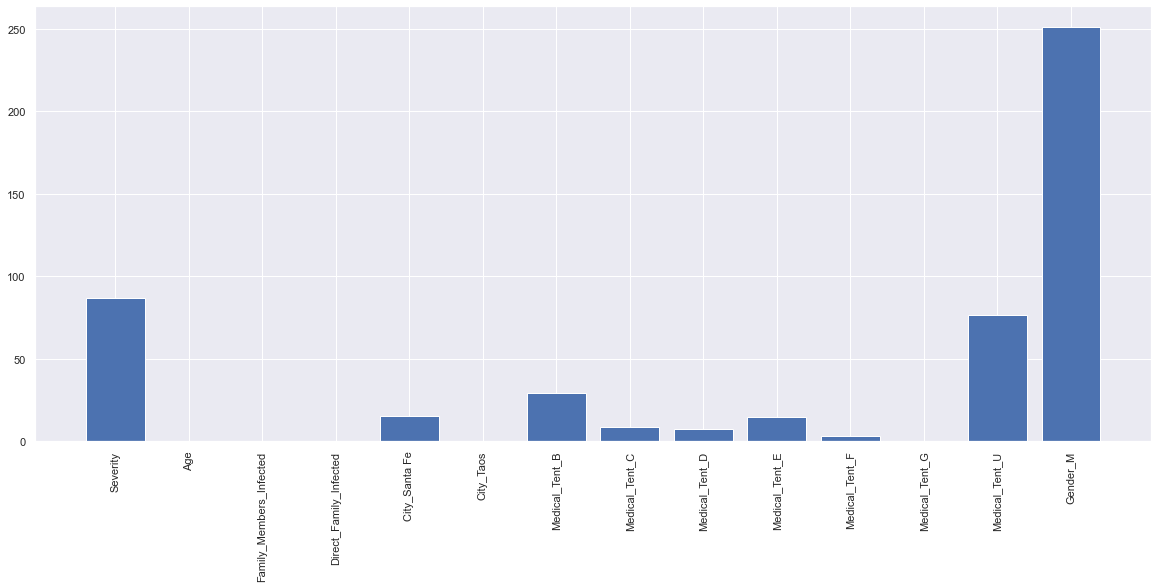

In [115]:
# ANOVA F-test

F_test = SelectKBest(score_func=f_classif, k='all').fit(features_X_train, y_train)

for f in range(len(F_test.scores_)):
    print('Feature %d: %f' %(f, F_test.scores_[f]))
print('----------------------')
print("Variables:", features_X_train.columns)

pyplot.figure(figsize=(20,8))
pyplot.bar(features_X_train.columns, F_test.scores_)
pyplot.xticks(rotation='vertical')
pyplot.show()

Feature 0: 0.044789
Feature 1: 0.007787
Feature 2: 0.047142
Feature 3: 0.032957
Feature 4: 0.077146
Feature 5: 0.030507
Feature 6: 0.000000
Feature 7: 0.001834
Feature 8: 0.016617
Feature 9: 0.000000
Feature 10: 0.000000
Feature 11: 0.002496
Feature 12: 0.001303
Feature 13: 0.050673
Feature 14: 0.135456
----------------------
Variables: Index(['Severity', 'Age', 'Family_Members_Infected', 'Direct_Family_Infected',
       'Medical_Expenses_Person', 'City_Santa Fe', 'City_Taos',
       'Medical_Tent_B', 'Medical_Tent_C', 'Medical_Tent_D', 'Medical_Tent_E',
       'Medical_Tent_F', 'Medical_Tent_G', 'Medical_Tent_U', 'Gender_M'],
      dtype='object')


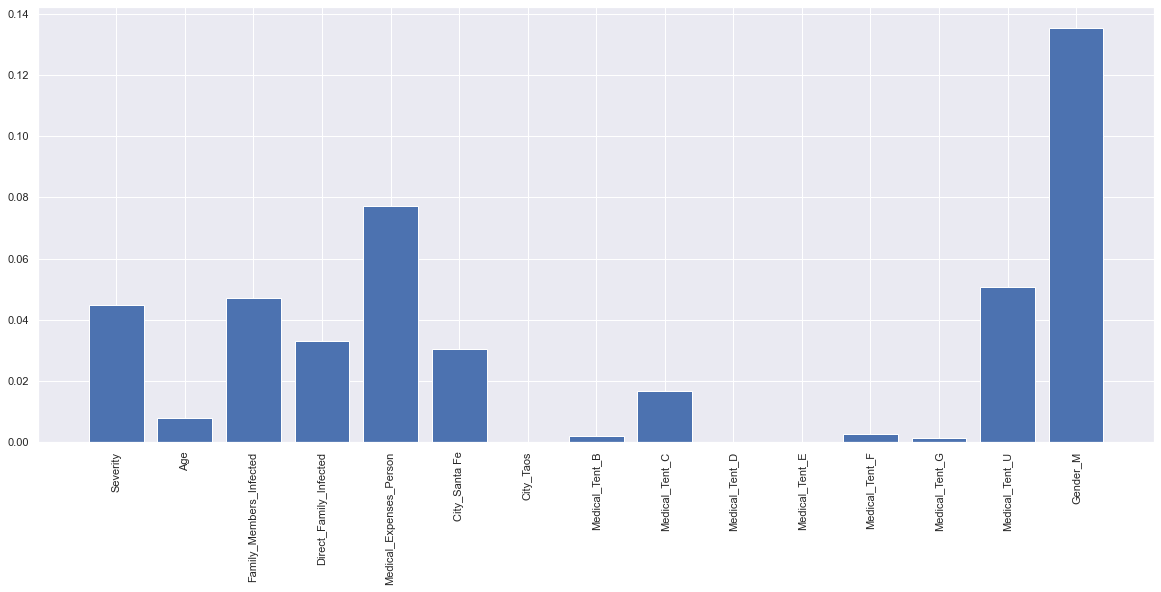

In [116]:
# Mutual Information Feature Selection - adapted for use with numerical input and categorical output.

mic = SelectKBest(score_func = mutual_info_classif, k='all').fit(X_train, y_train)

# what are scores for the features
for mi in range(len(mic.scores_)):
    print('Feature %d: %f' % (mi, mic.scores_[mi]))

print('----------------------')
print("Variables:", X_train.columns)

pyplot.figure(figsize=(20,8))
pyplot.bar(X_train.columns, mic.scores_)
pyplot.xticks(rotation='vertical')
pyplot.show()

In [117]:
L1 = LassoCV().fit(X_train, y_train)
L1.coef_

array([ 0.12955367,  0.08138709,  0.04608897, -0.00163359, -0.01340825,
        0.03583152, -0.        , -0.        ,  0.04892708, -0.        ,
       -0.10681631, -0.        ,  0.        ,  0.10544596,  0.4630879 ])

In [118]:
coef = pd.Series(L1.coef_, index = X_train.columns)
coef.sort_values()

Medical_Tent_E            -0.106816
Medical_Expenses_Person   -0.013408
Direct_Family_Infected    -0.001634
City_Taos                 -0.000000
Medical_Tent_B            -0.000000
Medical_Tent_D            -0.000000
Medical_Tent_F            -0.000000
Medical_Tent_G             0.000000
City_Santa Fe              0.035832
Family_Members_Infected    0.046089
Medical_Tent_C             0.048927
Age                        0.081387
Medical_Tent_U             0.105446
Severity                   0.129554
Gender_M                   0.463088
dtype: float64

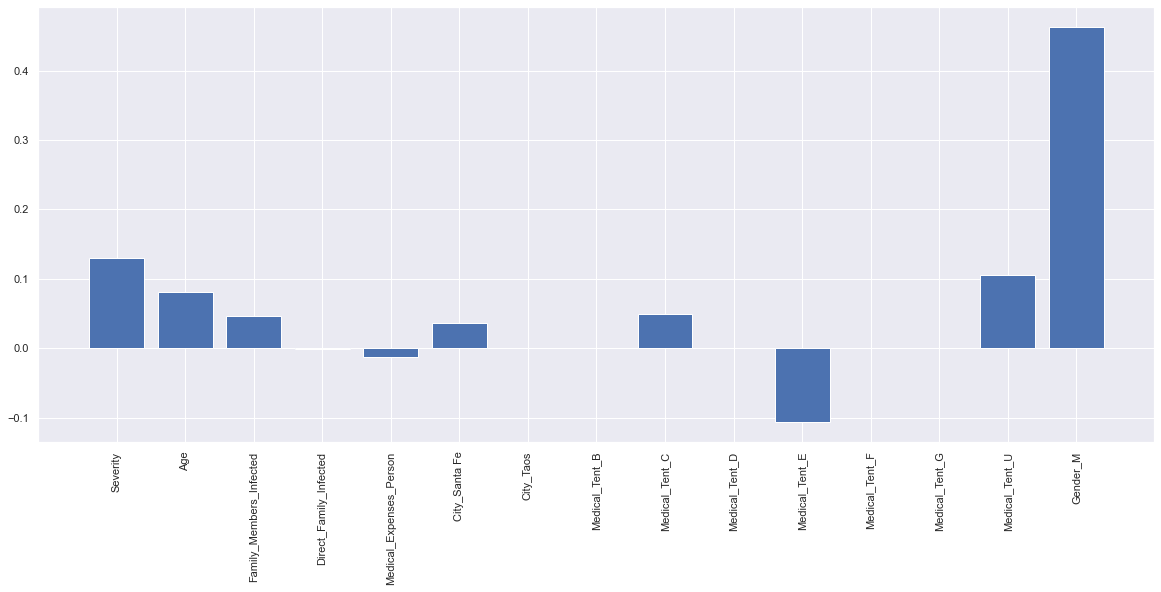

In [119]:
pyplot.figure(figsize=(20,8))
pyplot.bar(X_train.columns, L1.coef_)
pyplot.xticks(rotation='vertical')
pyplot.show()

In [120]:
L2 = RidgeClassifierCV().fit(features_X_train, y_train)

print("Predictor Variables:", features_X_train.columns)
L2.coef_

Predictor Variables: Index(['Severity', 'Age', 'Family_Members_Infected', 'Direct_Family_Infected',
       'City_Santa Fe', 'City_Taos', 'Medical_Tent_B', 'Medical_Tent_C',
       'Medical_Tent_D', 'Medical_Tent_E', 'Medical_Tent_F', 'Medical_Tent_G',
       'Medical_Tent_U', 'Gender_M'],
      dtype='object')


array([[ 0.29463639,  0.16638799,  0.07771575,  0.00146987,  0.11031858,
        -0.00377525, -0.05434455,  0.10680281, -0.03666646, -0.224115  ,
        -0.10002731,  0.10698466,  0.21687976,  0.88985743]])

In [121]:
#Ensemble method? Rank features according to its importance

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.predict(X_val)
dtc.feature_importances_ 

array([0.08371533, 0.24890558, 0.03896167, 0.05113479, 0.23038006,
       0.00781126, 0.01749128, 0.        , 0.00121311, 0.0032788 ,
       0.00851903, 0.        , 0.00239079, 0.0344183 , 0.27178001])

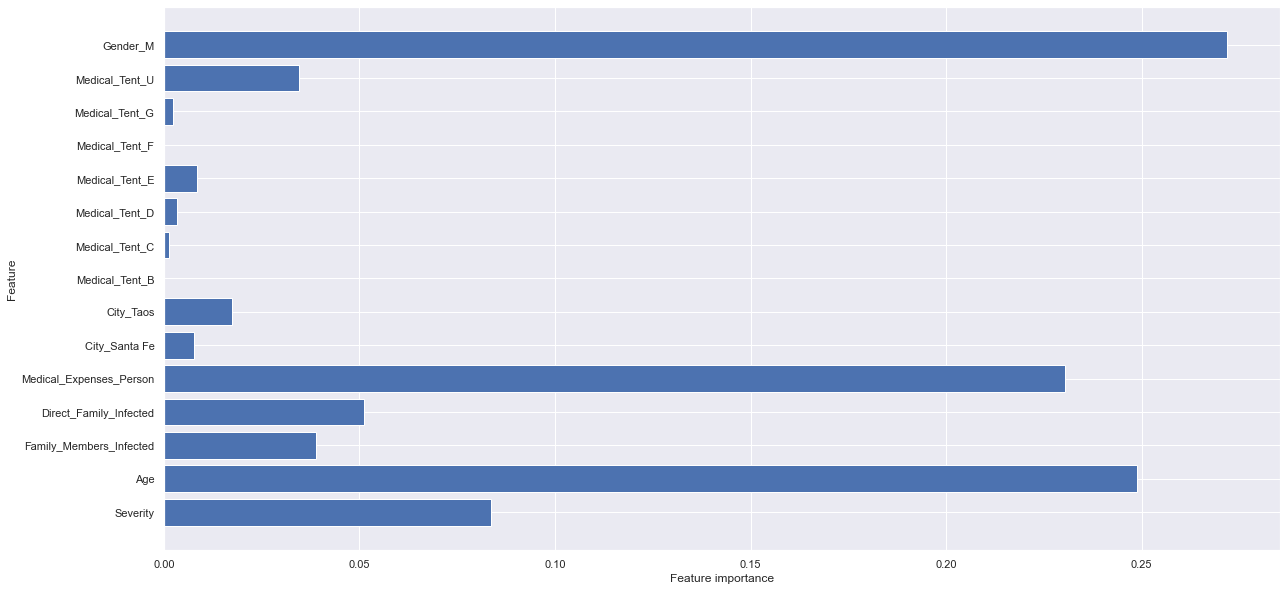

In [122]:
import numpy as np
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances(dtc)

In [123]:
table = pd.DataFrame()
table['Predictor Variables'] = features_X_train.columns
table['Selected Variables'] = rfe.support_
table['Attribute Rankings - RFE'] = rfe.ranking_
table['Attribute Rankings - RFE (RF)'] = rferf.ranking_
table

,Predictor Variables,Selected Variables,Attribute Rankings - RFE,Attribute Rankings - RFE (RF)
0,Severity,True,1,1
1,Age,True,1,1
2,Family_Members_Infected,False,3,2
3,Direct_Family_Infected,False,7,1
4,City_Santa Fe,True,1,4
5,City_Taos,False,6,7
6,Medical_Tent_B,False,4,6
7,Medical_Tent_C,True,1,8
8,Medical_Tent_D,False,5,9
9,Medical_Tent_E,True,1,5


### <font color='#6593a4'>Selected Features to use in the models ----- choosing features we're droping</font> <a class="anchor" id="second-bullet"></a>

In [124]:
#'Severity', 'Age', 'Family_Members_Infected', 'Direct_Family_Infected',
#       'Medical_Expenses_Person', 'City_Santa Fe', 'City_Taos',
#       'Medical_Tent_B', 'Medical_Tent_C', 'Medical_Tent_D', 'Medical_Tent_E',
#       'Medical_Tent_F', 'Medical_Tent_G', 'Medical_Tent_U', 'Gender_M'

In [125]:
# -------- Variables for model selection WITH SMOTE--------------
X_train01 = X_train_SMOTE[['Age','Severity','Gender_M','Direct_Family_Infected','Medical_Tent_C','Medical_Tent_E','Medical_Tent_G']]
X_val01 = X_val[['Age','Severity','Gender_M','Direct_Family_Infected','Medical_Tent_C','Medical_Tent_E','Medical_Tent_G']]


y_train01 = y_train_SMOTE.copy()
y_val01 = y_val.copy()

**Re-setting the indexes**

In [126]:
y_train01

0      0
1      1
2      0
3      1
4      1
      ..
807    0
808    0
809    0
810    0
811    0
Name: Deceased, Length: 812, dtype: int64

In [127]:
#X_train01 = X_train01.reset_index(drop=True)# ----- pôr se usar OVER SAMPLING
#X_val01 = X_val01.reset_index(drop=True)

In [128]:
#X_train01['Patient_ID'] = X_train01['Patient_ID'] -1   #----- NÃO pôr se usar OVER SAMPLING
#X_val01['Patient_ID'] = X_val01['Patient_ID'] -1

In [129]:
X_train01  # ----- X_train_SMOTE com a feature selection

,Age,Severity,Gender_M,Direct_Family_Infected,Medical_Tent_C,Medical_Tent_E,Medical_Tent_G
0,0.166667,-1.000000,-1.0,1.000000,0.000000,0.0,0.0
1,-0.388889,-1.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.277778,-1.000000,-1.0,3.000000,0.000000,0.0,0.0
3,-0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,-0.166667,-1.000000,0.0,2.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...
807,0.413426,-1.000000,-1.0,1.000000,0.000000,0.0,0.0
808,0.900769,-1.134872,-1.0,0.000000,0.000000,0.0,0.0
809,1.539399,-2.000000,-1.0,1.000000,0.000000,0.0,0.0
810,0.872432,-2.000000,-1.0,0.039098,1.000000,0.0,0.0


In [130]:
X_val01

,Age,Severity,Gender_M,Direct_Family_Infected,Medical_Tent_C,Medical_Tent_E,Medical_Tent_G
Patient_ID,,,,,,,
767,-0.722222,0.0,0.0,0.0,0.0,0.0,0.0
891,0.166667,-2.0,0.0,0.0,1.0,0.0,0.0
326,1.444444,-2.0,0.0,1.0,0.0,1.0,0.0
542,0.166667,0.0,0.0,0.0,0.0,0.0,0.0
580,0.000000,-1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
39,0.444444,0.0,0.0,0.0,0.0,0.0,0.0
88,-0.055556,-2.0,-1.0,5.0,1.0,0.0,0.0
276,2.000000,-2.0,0.0,0.0,0.0,0.0,0.0


In [131]:
y_val01

766    1
890    0
325    1
541    1
579    1
      ..
38     1
87     0
275    1
355    0
549    0
Name: Deceased, Length: 180, dtype: int64

# <font color='#6593a4'>Modelling</font> <a class="anchor" id="second-bullet"></a>

### <font color='#6593a4'>Logistic Regression</font> <a class="anchor" id="second-bullet"></a>

In [132]:
#Import the model and create an instance

log = LogisticRegressionCV(class_weight = 'balanced')

#Fit the model to the training data
log.fit(X_train01, y_train01)

LogisticRegressionCV(class_weight='balanced')

In [133]:
#weights of each variable/feature
log.coef_

array([[ 0.0994072 ,  0.40493648,  0.47696485,  0.01901287, -0.03067741,
        -0.05742699,  0.        ]])

In [134]:
log.intercept_

array([0.47808974])

In [135]:
#actual probabilities of each sample instead of the assigned class

pred_train_log = log.predict(X_train01)
pred_val_log = log.predict(X_val01)

In [136]:
print(log.score(X_train01, y_train01))
print(log.score(X_val01, y_val01))

0.7967980295566502
0.8


In [137]:
#Evaluate the model
#The confusion matrix in sklearn is presented in the following format:
##[[ TN FP]
# [FN TP ]]

In [138]:
def metrics(y_train01, pred_train_log , y_val01, pred_val_log):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train01, pred_train_log))
    print(confusion_matrix(y_train01, pred_train_log))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val01, pred_val_log))
    print(confusion_matrix(y_val01, pred_val_log))
    
metrics(y_train01, pred_train_log , y_val01, pred_val_log)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       406
           1       0.80      0.80      0.80       406

    accuracy                           0.80       812
   macro avg       0.80      0.80      0.80       812
weighted avg       0.80      0.80      0.80       812

[[323  83]
 [ 82 324]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [139]:
#If we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible, 
#without precision being too bad, and if we want to focus on minimising False positives, then our focus should be to 
#make Precision as close to 100% as possible

## Accuracy --- Measures the number of persons that were correctly predicted
## Recall ---  From all the instances that belongs to the positives(deceased), how many the model labeled as positive?
## Precison ---From all the instances the model predicted as positive, how many actually are positive?
## Specificity --- From all the instances that belongs to negative class, how many the model labeled as negative?

### F1 score --- weighted average of Precision and Recall

#Mais importante prever os que morreram ou que não morreram? Mais importante prever os que vão morrer (1) mesmo que não aconteça


### <font color='#6593a4'>K-Nearest Neighbors</font> <a class="anchor" id="second-bullet"></a>

In [140]:
#tried several n_neighbors from 3 to 15

knn = KNeighborsClassifier(n_neighbors=6).fit(X_train01, y_train01)

pred_train_KNN = knn.predict(X_train01)
pred_val_KNN = knn.predict(X_val01)

In [141]:
#knn.predict_proba(X_val01)

In [142]:
def metricsKNN(y_train01, pred_train_KNN , y_val01, pred_val_KNN):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train01, pred_train_KNN))
    print(confusion_matrix(y_train01, pred_train_KNN))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val01, pred_val_KNN))
    print(confusion_matrix(y_val01, pred_val_KNN))
    
metricsKNN(y_train01, pred_train_KNN , y_val01, pred_val_KNN)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       406
           1       0.85      0.84      0.84       406

    accuracy                           0.85       812
   macro avg       0.85      0.85      0.85       812
weighted avg       0.85      0.85      0.85       812

[[347  59]
 [ 66 340]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [143]:
param_grid = {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15],
              'weights': ['uniform','distance']
             }
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy').fit(X_train01, y_train01)
grid_search.best_params_

{'n_neighbors': 7}

### <font color='#6593a4'>Support vector machines (SVMs)</font> <a class="anchor" id="second-bullet"></a>

In [144]:
svm = SVC(kernel="rbf", C=100, gamma=1, probability=True).fit(X_train01, y_train01)

pred_train_SVM = svm.predict(X_train01)
pred_val_SVM = svm.predict(X_val01)

In [145]:
def metricsSVM(y_train01, pred_train_SVM , y_val01, pred_val_SVM):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train01, pred_train_SVM))
    print(confusion_matrix(y_train01, pred_train_SVM))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val01, pred_val_SVM))
    print(confusion_matrix(y_val01, pred_val_SVM))
    
metricsSVM(y_train01, pred_train_SVM , y_val01, pred_val_SVM)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.88       406
           1       0.85      0.93      0.89       406

    accuracy                           0.88       812
   macro avg       0.89      0.88      0.88       812
weighted avg       0.89      0.88      0.88       812

[[339  67]
 [ 29 377]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy').fit(X_train01, y_train01)
grid_search.best_params_

{'C': 100, 'gamma': 1}

### <font color='#6593a4'>Naive Bayes</font> <a class="anchor" id="second-bullet"></a>

In [147]:
nb = GaussianNB().fit(X_train01, y_train01)

In [148]:
pred_train_NB = nb.predict(X_train01)
pred_val_NB = nb.predict(X_val01)
#nb.predict_proba(X_val01)

In [149]:
nb.score(X_train01, y_train01)

0.7881773399014779

In [150]:
nb.score(X_val01, y_val01) #usually accuracy of the model is slightly higher in the train dataset

0.8444444444444444

In [151]:
#mean of each feature per class ## with all features to see the mean
pd.DataFrame(data=nb.theta_, columns=X_train01.columns).T

,0,1
Age,0.067991,0.103722
Severity,-1.075370,-0.440887
Gender_M,-0.675540,-0.140394
Direct_Family_Infected,0.896072,0.901478
Medical_Tent_C,0.094512,0.034483
Medical_Tent_E,0.076941,0.009852
Medical_Tent_G,0.000000,0.000000


In [152]:
#variance of each feature per class
pd.DataFrame(data=nb.sigma_, columns=X_train01.columns).T

,0,1
Age,6.218546e-01,5.902422e-01
Severity,7.380730e-01,4.928110e-01
Gender_M,2.105232e-01,1.206836e-01
Direct_Family_Infected,1.203610e+00,3.620835e+00
Medical_Tent_C,7.863078e-02,3.329370e-02
Medical_Tent_E,6.744418e-02,9.755153e-03
Medical_Tent_G,2.412230e-09,2.412230e-09


### <font color='#6593a4'>Decision Trees</font> <a class="anchor" id="second-bullet"></a>

In [153]:
#to avoid the problem we had last time in class
!pip install scikit-learn

In [154]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=28)
dt.fit(X_train01, y_train01)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=28)

In [155]:
print(dt.score(X_train01, y_train01))
print(dt.score(X_val01, y_val01))

0.8460591133004927
0.8


#### <font color='#6593a4'>GridSearch</font> <a class="anchor" id="second-bullet"></a>

In [156]:
tree_parameters = {'criterion': ['gini','entropy'],
                   'max_depth': np.arange(3, 10), 
                   'max_leaf_nodes' : np.arange(3, 20)}

decision_tree = GridSearchCV(DecisionTreeClassifier(), tree_parameters, cv=5, scoring='accuracy')
decision_tree.fit(X_train01, y_train01)
decision_tree.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 18}

In [157]:
!pip install pydotplus

In [158]:
# import the needed packages
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

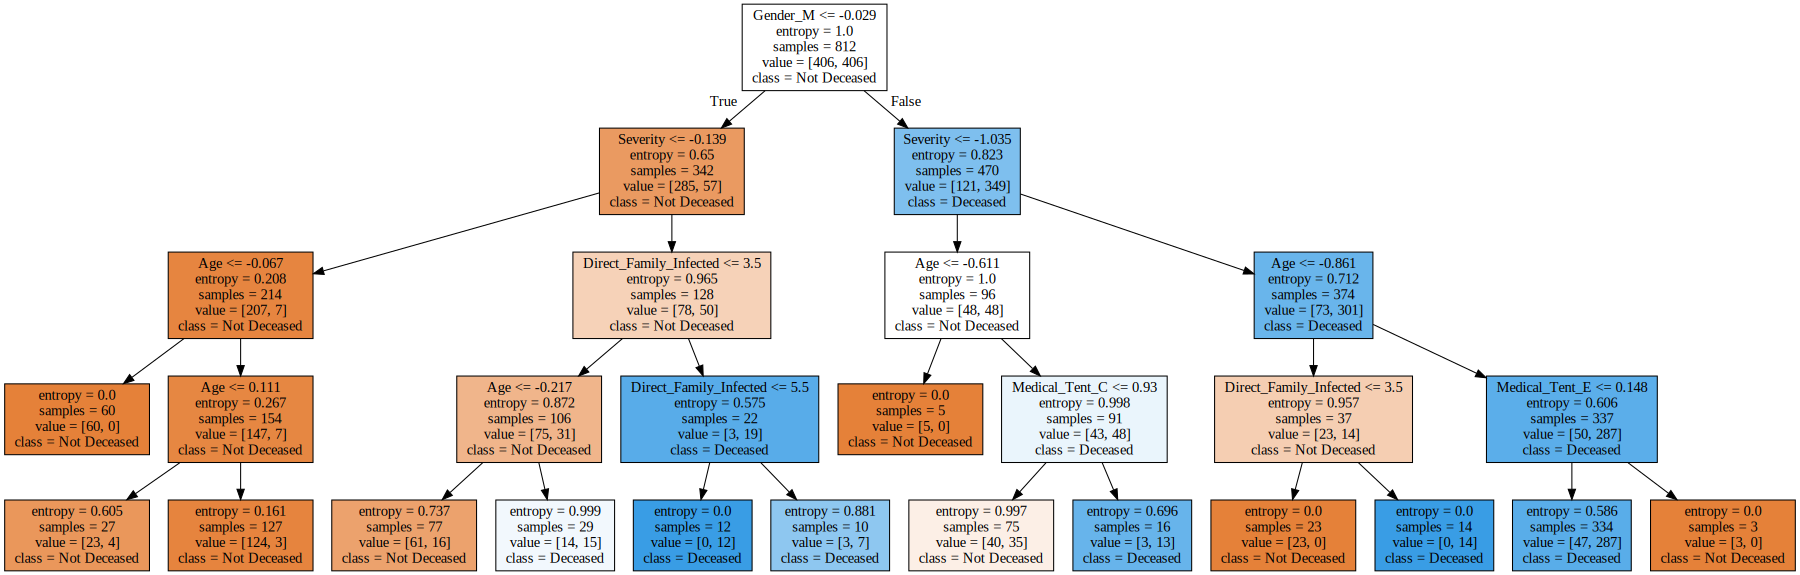

In [159]:
# Export a decision tree in DOT format
dot_dt = tree.export_graphviz(dt, out_file=None, feature_names=X_train01.columns,
                    class_names=["Not Deceased", "Deceased"],  
                    filled=True)  
# Process graphs in Graphviz’s dot language
pydot_graph = pydotplus.graph_from_dot_data(dot_dt)
pydot_graph.set_size('"25,25!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [160]:
pred_train_dt = dt.predict(X_train01)
pred_val_dt = dt.predict(X_val01)

In [161]:
def metrics(y_train01, pred_train_dt , y_val01, pred_val_dt):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train01, pred_train_dt))
    print(confusion_matrix(y_train01, pred_train_dt))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val01, pred_val_dt))
    print(confusion_matrix(y_val01, pred_val_dt))
    
metrics(y_train01, pred_train_dt, y_val01, pred_val_dt)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       406
           1       0.84      0.86      0.85       406

    accuracy                           0.85       812
   macro avg       0.85      0.85      0.85       812
weighted avg       0.85      0.85      0.85       812

[[339  67]
 [ 58 348]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [162]:
dt.predict_proba(X_val01)

array([[0.14071856, 0.85928144],
       [0.1875    , 0.8125    ],
       [0.53333333, 0.46666667],
       [0.14071856, 0.85928144],
       [0.14071856, 0.85928144],
       [0.97637795, 0.02362205],
       [0.        , 1.        ],
       [0.14071856, 0.85928144],
       [0.14071856, 0.85928144],
       [0.14071856, 0.85928144],
       [0.14071856, 0.85928144],
       [1.        , 0.        ],
       [0.14071856, 0.85928144],
       [0.79220779, 0.20779221],
       [0.14071856, 0.85928144],
       [0.97637795, 0.02362205],
       [0.97637795, 0.02362205],
       [0.14071856, 0.85928144],
       [0.14071856, 0.85928144],
       [0.53333333, 0.46666667],
       [0.14071856, 0.85928144],
       [0.48275862, 0.51724138],
       [0.14071856, 0.85928144],
       [0.14071856, 0.85928144],
       [0.53333333, 0.46666667],
       [0.97637795, 0.02362205],
       [0.97637795, 0.02362205],
       [0.14071856, 0.85928144],
       [0.14071856, 0.85928144],
       [0.53333333, 0.46666667],
       [0.

In [163]:
dt.feature_importances_

array([0.11615044, 0.19721005, 0.50868914, 0.14467739, 0.01228952,
       0.02098345, 0.        ])

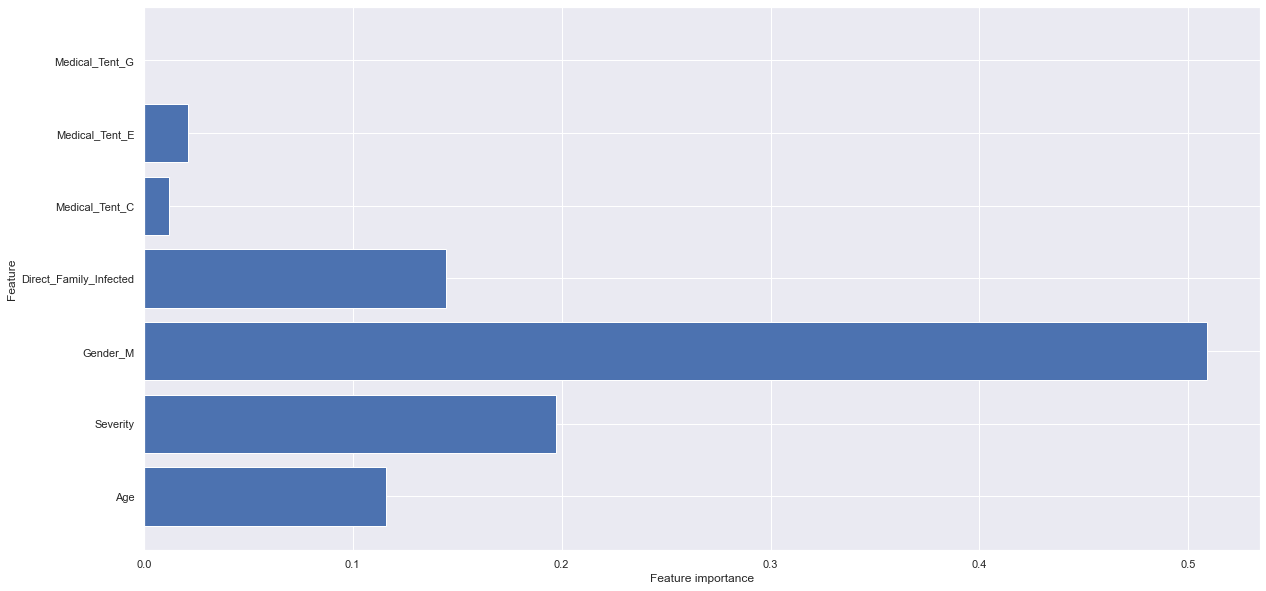

In [164]:
def plot_feature_importances(model):
    n_features = X_train01.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train01.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances(dt)

#### <font color='#6593a4'>Decision Trees maximum depth</font> <a class="anchor" id="second-bullet"></a>

In [165]:
depths = (4,6,8,10,12,14)

In [166]:
for depth in depths:
    dt_maxdepth = DecisionTreeClassifier(max_depth=depth)
    dt_maxdepth.fit(X_train01, y_train01)
    train_score=dt_maxdepth.score(X_train01, y_train01)
    test_score=dt_maxdepth.score(X_val01, y_val01)
    print(depth, 'train score:',train_score, 'test score:',test_score)

4 train score: 0.8497536945812808 test score: 0.7944444444444444
6 train score: 0.8817733990147784 test score: 0.8611111111111112
8 train score: 0.9088669950738916 test score: 0.8444444444444444
10 train score: 0.9224137931034483 test score: 0.8277777777777777
12 train score: 0.9310344827586207 test score: 0.8111111111111111
14 train score: 0.9359605911330049 test score: 0.8222222222222222


<function matplotlib.pyplot.show(close=None, block=None)>

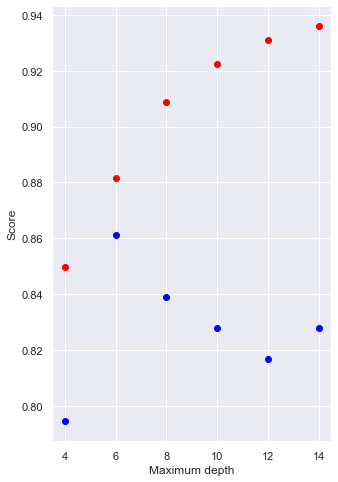

<Figure size 1080x1080 with 0 Axes>

In [167]:
for depth in depths:
    dt_maxdepth = DecisionTreeClassifier(max_depth=depth)
    dt_maxdepth.fit(X_train01, y_train01)
    train_score=dt_maxdepth.score(X_train01, y_train01)
    test_score=dt_maxdepth.score(X_val01, y_val01)
    plt.scatter(depth,train_score, color='red')
    plt.scatter(depth,test_score, color='blue')

plt.xlabel("Maximum depth")
plt.ylabel("Score")
plt.figure(figsize=(15,15))
plt.show

In [168]:
y_pred = dt_maxdepth.predict(X_val01)

In [169]:
accuracy_score(y_val01, y_pred)

0.8277777777777777

#### <font color='#6593a4'>Decision Trees maximum number of leaf nodes</font> <a class="anchor" id="second-bullet"></a>

In [170]:
leaves = (4,8,12,16,20,24,28)

for leaf in leaves:
    model_DT_maxleaf = DecisionTreeClassifier(max_leaf_nodes=leaf)
    model_DT_maxleaf.fit(X_train01, y_train01)
    train_score=model_DT_maxleaf.score(X_train01, y_train01)
    test_score=model_DT_maxleaf.score(X_val01, y_val01)
    print(leaf, 'train score:',train_score, 'test score:',test_score)

4 train score: 0.7807881773399015 test score: 0.7722222222222223
8 train score: 0.8325123152709359 test score: 0.8
12 train score: 0.8497536945812808 test score: 0.7944444444444444
16 train score: 0.8706896551724138 test score: 0.8611111111111112
20 train score: 0.8768472906403941 test score: 0.8611111111111112
24 train score: 0.8780788177339901 test score: 0.8555555555555555
28 train score: 0.8891625615763546 test score: 0.85


In [171]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

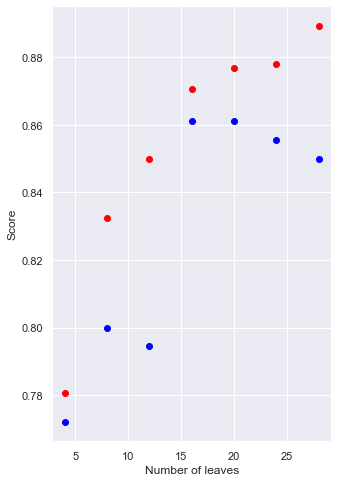

<Figure size 1080x1080 with 0 Axes>

In [172]:
for leaf in leaves:
    dt_maxleaf = DecisionTreeClassifier(max_leaf_nodes=leaf)
    dt_maxleaf.fit(X_train01, y_train01)
    train_score=dt_maxleaf.score(X_train01, y_train01)
    test_score=dt_maxleaf.score(X_val01, y_val01)
    plt.scatter(leaf,train_score, color='red')
    plt.scatter(leaf,test_score, color='blue')
plt.xlabel("Number of leaves")
plt.ylabel("Score")
plt.figure(figsize=(15,15))
plt.show

In [173]:
y_pred = dt_maxleaf.predict(X_val01)

In [174]:
accuracy_score(y_val01, y_pred)

0.85

In [175]:
from mpl_toolkits.mplot3d import Axes3D

Best test score: 0.8611111111111112 Number of leaves: 16 Depth: 6
Minimum difference score: 0.008565955117679214 Number of leaves: 4 Depth: 4


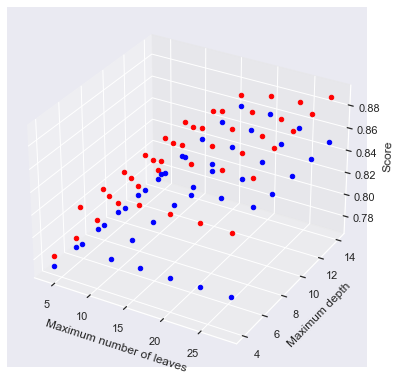

In [176]:
fig = plt.figure()
ax = Axes3D(fig)
max_score=0
max_leaf=0
max_depth=0
dif_score=1
dif_leaf=0
dif_depth=0
for leaf in leaves:
    for depth in depths:
        dt_maxdepth = DecisionTreeClassifier(max_leaf_nodes=leaf, max_depth=depth)
        dt_maxdepth.fit(X_train01, y_train01)
        train_score=dt_maxdepth.score(X_train01, y_train01)
        test_score=dt_maxdepth.score(X_val01, y_val01)
        ax.scatter(leaf,depth,train_score, color='red')
        ax.scatter(leaf,depth,test_score, color='blue')
        if test_score>max_score:
            max_score = test_score
            max_leaf = leaf
            max_depth = depth
        if train_score-test_score<dif_score:
            dif_score = train_score-test_score
            dif_leaf = leaf
            dif_depth = depth
plt.xlabel("Maximum number of leaves")
plt.ylabel("Maximum depth")
ax.set_zlabel("Score")
plt.show
print("Best test score:",max_score,"Number of leaves:",max_leaf,"Depth:",max_depth)
print("Minimum difference score:", dif_score,"Number of leaves:",dif_leaf,"Depth:",dif_depth)

### <font color='#6593a4'>ROC curve</font> <a class="anchor" id="second-bullet"></a>

In [177]:
#prob_log_model= log_model.predict_proba(X_test)
#prob_modelNB= modelNB.predict_proba(X_test)
prob_dt= dt.predict_proba(X_val01)

In [178]:
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_val, prob_dt[:, 1])

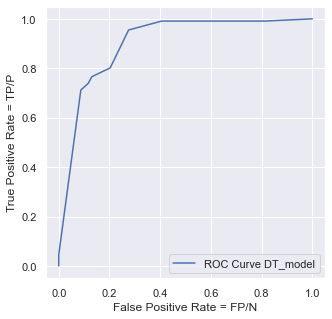

In [179]:
plt.figure(figsize=(5,5))
plt.plot(fpr_DT, tpr_DT, label="ROC Curve DT_model")
plt.xlabel("False Positive Rate = FP/N")
plt.ylabel("True Positive Rate = TP/P")
plt.legend()
plt.show()

### <font color='#6593a4'>Recall curve</font> <a class="anchor" id="second-bullet"></a>

In [180]:
precision_DT, recall_DT, thresholds_DT = precision_recall_curve(y_val, prob_dt[:, 1])

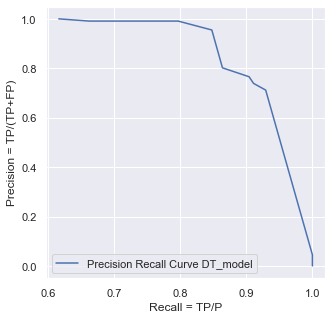

In [181]:
plt.figure(figsize=(5,5))
plt.plot(precision_DT, recall_DT, label="Precision Recall Curve DT_model")
plt.xlabel("Recall = TP/P")
plt.ylabel("Precision = TP/(TP+FP)")
plt.legend()
plt.show()

## <font color='#6593a4'>Random Forest</font> <a class="anchor" id="second-bullet"></a>

In [182]:
rf = RandomForestClassifier(max_depth=8, max_leaf_nodes=20, criterion='entropy')
# bootstrap=False

In [183]:
rf.fit(X_train01, y_train01)

RandomForestClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=20)

In [184]:
y_pred_train_rf = rf.predict(X_train01)
y_pred_val_rf = rf.predict(X_val01)

In [185]:
#rf.predict_proba(X_val01)

In [186]:
print(rf.score(X_train01, y_train01))
print(rf.score(X_val01, y_val01))

0.8719211822660099
0.8611111111111112


In [187]:
def metrics(y_train01, y_pred_train_rf , y_val01, y_pred_val_rf):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train01, y_pred_train_rf))
    print(confusion_matrix(y_train01, y_pred_train_rf))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val01, y_pred_val_rf))
    print(confusion_matrix(y_val01, y_pred_val_rf))
    
metrics(y_train01, y_pred_train_rf, y_val01, y_pred_val_rf)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       406
           1       0.85      0.90      0.88       406

    accuracy                           0.87       812
   macro avg       0.87      0.87      0.87       812
weighted avg       0.87      0.87      0.87       812

[[343  63]
 [ 41 365]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [188]:
print(X_train01.columns)
print(rf.feature_importances_)

Index(['Age', 'Severity', 'Gender_M', 'Direct_Family_Infected',
       'Medical_Tent_C', 'Medical_Tent_E', 'Medical_Tent_G'],
      dtype='object')
[0.17475431 0.17005993 0.47222619 0.12366475 0.02313812 0.0361567
 0.        ]


#### <font color='#6593a4'>GridSearch</font> <a class="anchor" id="second-bullet"></a>

In [189]:
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True) 

param_grid = {'max_depth':[4, 5, 6, 7, 8, 10],
              'max_leaf_nodes':[8, 14, 18, 20, 28],
              'criterion': ['gini','entropy']
             }

grid_rfc = GridSearchCV(rfc, param_grid=param_grid, scoring='accuracy')
grid_rfc.fit(X_train01, y_train01)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_leaf_nodes': [8, 14, 18, 20, 28]},
             scoring='accuracy')

In [190]:
grid_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 28}

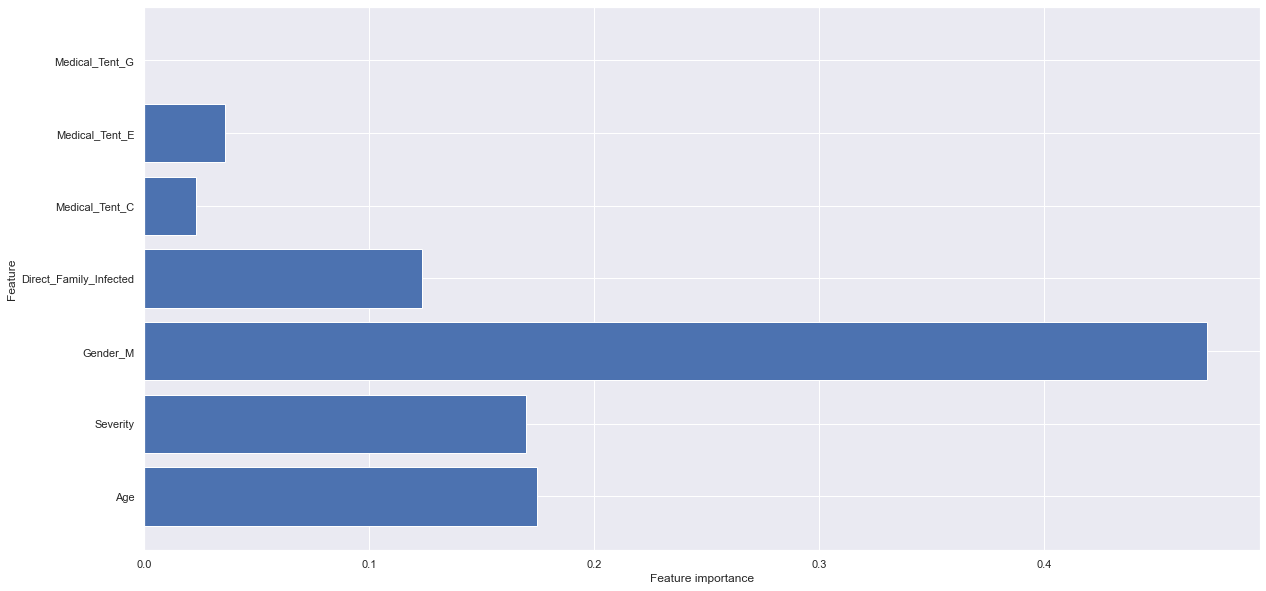

In [191]:
import numpy as np
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train01.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train01.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances(rf)

<function matplotlib.pyplot.show(close=None, block=None)>

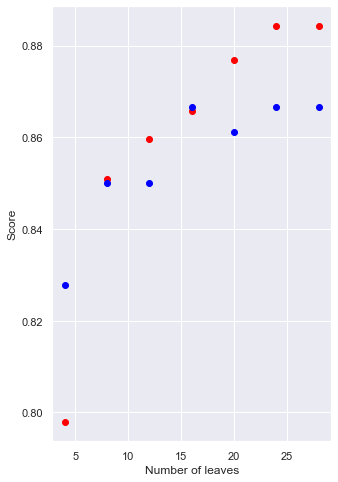

<Figure size 360x576 with 0 Axes>

In [192]:
for leaf in leaves:
    rf_maxleaf = RandomForestClassifier(max_leaf_nodes=leaf)
    rf_maxleaf.fit(X_train01, y_train01)
    train_score=rf_maxleaf.score(X_train01, y_train01)
    test_score=rf_maxleaf.score(X_val01, y_val01)
    plt.scatter(leaf,train_score, color='red')
    plt.scatter(leaf,test_score, color='blue')
plt.xlabel("Number of leaves")
plt.ylabel("Score")
plt.figure()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

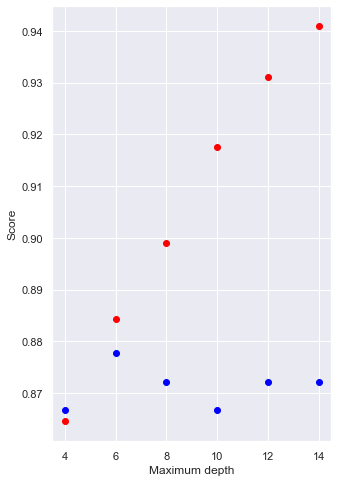

<Figure size 360x576 with 0 Axes>

In [193]:
for depth in depths:
    rf_maxleaf = RandomForestClassifier(max_depth=depth)
    rf_maxleaf.fit(X_train01, y_train01)
    train_score=rf_maxleaf.score(X_train01, y_train01)
    test_score=rf_maxleaf.score(X_val01, y_val01)
    plt.scatter(depth,train_score, color='red')
    plt.scatter(depth,test_score, color='blue')
plt.xlabel("Maximum depth")
plt.ylabel("Score")
plt.figure()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

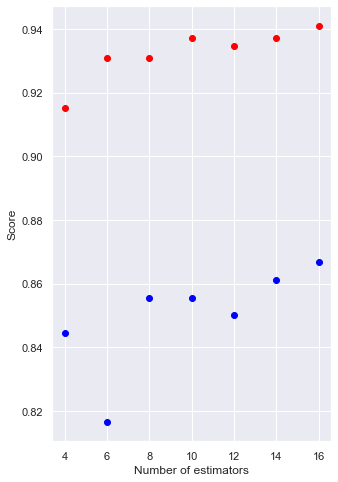

<Figure size 360x576 with 0 Axes>

In [194]:
estimators=(4,6,8,10,12,14,16)
for estimator in estimators:
    rf_estimator = RandomForestClassifier(n_estimators=estimator)
    rf_estimator.fit(X_train01, y_train01)
    train_score=rf_estimator.score(X_train01, y_train01)
    test_score=rf_estimator.score(X_val01, y_val01)
    plt.scatter(estimator,train_score, color='red')
    plt.scatter(estimator,test_score, color='blue')
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.figure()
plt.show

### <font color='#6593a4'>Balanced Algorithms</font> <a class="anchor" id="second-bullet"></a>

In [195]:
from imblearn.ensemble import BalancedRandomForestClassifier

BRF = BalancedRandomForestClassifier(max_depth=8, max_leaf_nodes=20, criterion='entropy', class_weight="balanced", max_samples=0.8)

BRF.fit(X_train01, y_train01)
BRF.predict(X_val01)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0], dtype=int64)

In [196]:
print(BRF.score(X_train01, y_train01))
print(BRF.score(X_val01, y_val01))

0.8706896551724138
0.8611111111111112


In [197]:
from imblearn.ensemble import BalancedBaggingClassifier
BKNN = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10), max_samples=0.8)
BKNN.fit(X_train01, y_train01)

BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10),
                          max_samples=0.8)

In [198]:
print(BKNN.score(X_train01, y_train01))
print(BKNN.score(X_val01, y_val01))

0.8448275862068966
0.8555555555555555


### <font color='#6593a4'>Neural Network</font> <a class="anchor" id="second-bullet"></a>

In [247]:
#learning_rate_init - only for sgd and adam
#The learning rate (Only for sgd) ---- learning_rate = 'adaptive, invscaling, constant '

nn = MLPClassifier(hidden_layer_sizes = (10,10,10), 
                   activation = 'tanh',
                   solver = 'adam',
                   #learning_rate = 'adaptive',
                   learning_rate_init = 0.1,
                   max_iter=100
                  )

In [248]:
nn.fit(X_train01, y_train01)

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10, 10),
              learning_rate_init=0.1, max_iter=100)

<AxesSubplot:>

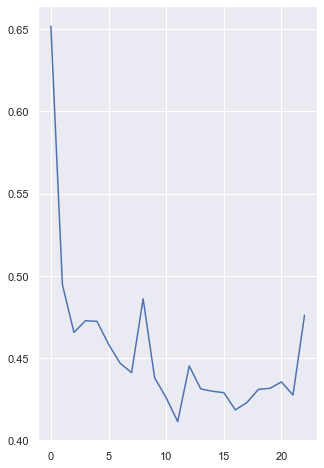

In [249]:
losses = nn.loss_curve_
iterations = range(nn.n_iter_)
import seaborn as sns
sns.lineplot(iterations, losses)

In [250]:
nn.loss_

0.47610919075267105

In [251]:
pred_train_NN = nn.predict(X_train01)
pred_val_NN = nn.predict(X_val01)

In [252]:
def metrics(y_train01, pred_train_NN , y_val01, pred_val_NN):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train01, pred_train_NN))
    print(confusion_matrix(y_train01, pred_train_NN))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val01, pred_val_NN))
    print(confusion_matrix(y_val01, pred_val_NN))
    
metrics(y_train01, pred_train_NN , y_val01, pred_val_NN)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       406
           1       0.82      0.85      0.84       406

    accuracy                           0.83       812
   macro avg       0.83      0.83      0.83       812
weighted avg       0.83      0.83      0.83       812

[[329  77]
 [ 59 347]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [205]:
#[[TN FP]
#[FN TP]]

#### <font color='#6593a4'>GridSearch</font> <a class="anchor" id="second-bullet"></a>

In [206]:
--- stop running before the gridsearches ----

SyntaxError: invalid syntax (<ipython-input-206-1b5076bcc9ef>, line 1)

In [207]:
# tanh and logistic more appropriate for classification

parameter_space = {'hidden_layer_sizes': [(18,18,18), (10,10,10), (25,25,25)],
                   'activation': ['tanh', 'logistic'],
                   'solver': ['sgd', 'adam'],
                   'max_iter': [100, 250, 300, 500],
                   'learning_rate': ['invscaling','constant','adaptive'],
                   'learning_rate_init': [0.001, 0.0505,0.1]
                  }

In [208]:
model = MLPClassifier()

In [209]:
neural = GridSearchCV(model, parameter_space, scoring='accuracy').fit(X_train01, y_train01)
neural.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (25, 25, 25),
 'learning_rate': 'constant',
 'learning_rate_init': 0.0505,
 'max_iter': 500,
 'solver': 'adam'}

### <font color='#6593a4'>Baggigng Classifier</font> <a class="anchor" id="second-bullet"></a>

In [210]:
svc_bagging = BaggingClassifier(SVC(kernel="rbf", C=10, gamma=0.1)).fit(X_train01, y_train01)

In [211]:
svc_bagging.score(X_val01, y_val01)

0.8555555555555555

### <font color='#6593a4'>Stacking Classifier</font> <a class="anchor" id="second-bullet"></a>

In [253]:
estimators = [("KNN",KNeighborsClassifier(n_neighbors=10)),
              ("SVC",SVC(kernel="rbf", C=10, gamma=1)),
              ("RF",RandomForestClassifier(max_depth=10, max_leaf_nodes=28, criterion='entropy')),
              ("NN",MLPClassifier(hidden_layer_sizes = (10,10,10), 
                   activation = 'tanh',
                   solver = 'adam',
                   #learning_rate = 'adaptive',
                   learning_rate_init = 0.1,
                   max_iter=100
                  ))]

stck = StackingClassifier(estimators=estimators, cv=StratifiedKFold(10)) #final_estimator=KNeighborsClassifier(n_neighbors=5)

In [254]:
stck.fit(X_train01, y_train01)

StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x24293E4B240, shuffle=False),
                   estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                               ('SVC', SVC(C=10, gamma=1)),
                               ('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=28)),
                               ('NN',
                                MLPClassifier(activation='tanh',
                                              hidden_layer_sizes=(10, 10, 10),
                                              learning_rate_init=0.1,
                                              max_iter=100))])

In [255]:
stck.score(X_train01, y_train01)

0.8916256157635468

In [256]:
stck.score(X_val01, y_val01)

0.8722222222222222

**Sensitivity Analysis of K**

Ideal: 0.787
> folds=2, accuracy=0.783 (0.781,0.786)
> folds=3, accuracy=0.786 (0.767,0.801)
> folds=4, accuracy=0.783 (0.759,0.793)
> folds=5, accuracy=0.782 (0.753,0.804)
> folds=6, accuracy=0.788 (0.733,0.809)
> folds=7, accuracy=0.783 (0.698,0.819)
> folds=8, accuracy=0.787 (0.693,0.842)
> folds=9, accuracy=0.787 (0.711,0.833)
> folds=10, accuracy=0.787 (0.679,0.841)
> folds=11, accuracy=0.787 (0.671,0.838)
> folds=12, accuracy=0.787 (0.657,0.838)
> folds=13, accuracy=0.786 (0.694,0.839)
> folds=14, accuracy=0.787 (0.655,0.862)
> folds=15, accuracy=0.786 (0.667,0.852)
> folds=16, accuracy=0.788 (0.640,0.882)
> folds=17, accuracy=0.787 (0.617,0.875)
> folds=18, accuracy=0.788 (0.600,0.889)
> folds=19, accuracy=0.788 (0.619,0.884)
> folds=20, accuracy=0.785 (0.600,0.902)


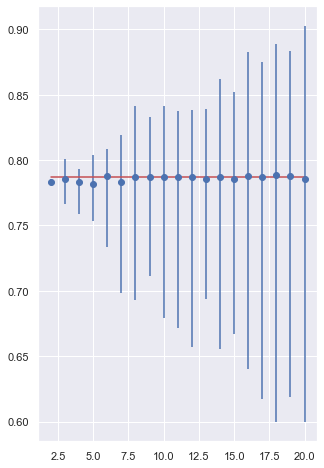

In [216]:
# sensitivity analysis of k in k-fold cross-validation
 
# evaluate the model using a given test condition
def evaluate_model(cv):
    # evaluate the model
    scores = cross_val_score(LogisticRegression(), X_train01, y_train01, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,20+1)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=5)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

### <font color='#ff574d'>K-Fold Cross-Validation</font> <a class="anchor" id="second-bullet"></a>

In [217]:
def avg_score(model):
    # apply kfold
    kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    # get the indexes of the observations assigned for each partition
    for train_index, val_index in kf.split(data, target):
        X_train_KF, X_val_KF = data.iloc[train_index], data.iloc[val_index]
        y_train_KF, y_val_KF = target.iloc[train_index], target.iloc[val_index]
        # fit the model to the data
        model.fit(X_train01, y_train01)
        # check the mean accuracy for the train
        value_train = model.score(X_train01, y_train01)
        # check the mean accuracy for the val
        value_val = model.score(X_val01,y_val01)
        # append the accuracies in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_train = round(np.mean(score_train),2)
    avg_val = round(np.mean(score_val),2)
    std_train = round(np.std(score_train),3)
    std_val = round(np.std(score_val),3)
    
    return str(avg_train) + ' +/- ' + str(std_train),\
str(avg_val) + ' +/- ' + str(std_val)

In [218]:
def show_results(df, *alg):
    
#Receive an empty dataframe and the different models and call the function avg_score
    count = 0
    # for each model passed as argument
    for alg in alg:
        # obtain the results provided by avg_score
        avg_train, avg_val = avg_score(alg)
        # store the results in the right row
        df.iloc[count] = avg_train, avg_val
        count+=1
    return df

In [219]:
model = [svm, dt, rf, BRF, BKNN, nn, stck]
classif = ['Support Vector Machine','Decision Tree','Random Forest','Balanced Random Forest', 'Balanced Bagging KNN', 
           'Neural Network', 'Stacking']

df = pd.DataFrame(columns = ['Train','Validation'], index = [classif])
show_results(df, svm, dt, rf, BRF, BKNN, nn, stck)

,Train,Validation
Support Vector Machine,0.88 +/- 0.0,0.87 +/- 0.0
Decision Tree,0.85 +/- 0.0,0.8 +/- 0.0
Random Forest,0.87 +/- 0.002,0.86 +/- 0.004
Balanced Random Forest,0.87 +/- 0.004,0.87 +/- 0.006
Balanced Bagging KNN,0.84 +/- 0.004,0.85 +/- 0.02
Neural Network,0.84 +/- 0.015,0.86 +/- 0.014
Stacking,0.88 +/- 0.001,0.88 +/- 0.003


### <font color='#ff574d'>ROC Curve</font> <a class="anchor" id="second-bullet"></a>

In [220]:
from sklearn.metrics import roc_curve

#prob_log_model= log.predict_proba(X_val01)
#prob_modelNB= nb.predict_proba(X_val01)
#prob_dt= dt.predict_proba(X_val01)
prob_svm = svm.predict_proba(X_val01)
prob_rf= rf.predict_proba(X_val01)
prob_brf= BRF.predict_proba(X_val01)
#prob_bknn= BKNN.predict_proba(X_val01)
prob_nn= nn.predict_proba(X_val01)
prob_stack= stck.predict_proba(X_val01)

In [221]:
prob_models = [prob_svm, prob_rf,prob_brf, prob_nn, prob_stack]
models = ['Support Vector Machine', 'Random Forest', 'Balanced Random Forest', 'Neural Network', 'Stacking']

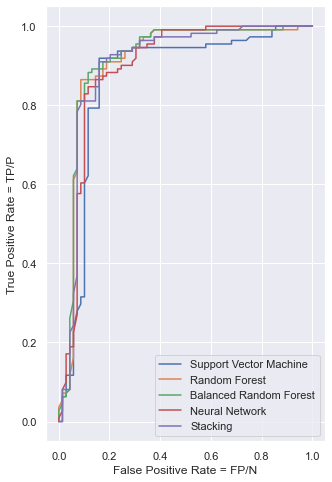

In [222]:
for prob_model, model in zip(prob_models, models):
    fpr, tpr, thresholds = roc_curve(y_val, prob_model[:, 1])  ## y_val or y_val01
    plt.plot(fpr, tpr, label=model)
plt.xlabel("False Positive Rate = FP/N")
plt.ylabel("True Positive Rate = TP/P")
plt.legend()
plt.show()

### <font color='#ff574d'>Recall Curve</font> <a class="anchor" id="second-bullet"></a>

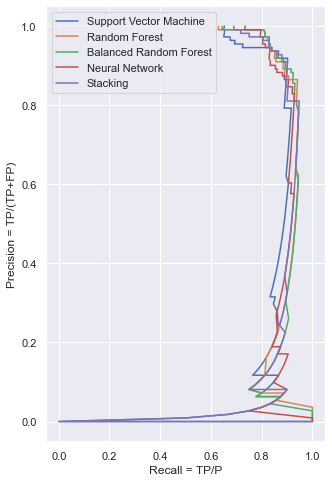

In [223]:
from sklearn.metrics import precision_recall_curve

for prob_model, model in zip(prob_models, models):
    precision, recall, thresholds = precision_recall_curve(y_val, prob_model[:, 1])
    plt.plot(precision, recall, label=model)
plt.xlabel("Recall = TP/P")
plt.ylabel("Precision = TP/(TP+FP)")
plt.legend()
plt.show()

# <font color='#ff574d'>Final Model</font> <a class="anchor" id="second-bullet"></a>

### <font color='#ff574d'>Feature Engineering</font> <a class="anchor" id="second-bullet"></a>
- code in notes only if used train and val data were concatenated and then used for the final training

In [224]:
# -------- Variables (preprocessed) for FINAL model (NOT NORMALIZED) --------------

# -------------------------- 2nd APPROACH NOT USED -------------------------------

#X_train_Final
#X_val_Final
#y_train_Final
#y_val_Final

In [225]:
#X_val_Final.index = X_val_Final.index + 1000
#y_val_Final.index = y_val_Final.index + 1000

In [226]:
#X = pd.concat([X_train_Final, X_val_Final]) #ignore_index=True
#X = X.reset_index(drop=True)

# --- y is the train and validation data together
#y = pd.concat([y_train_Final, y_val_Final]) #ignore_index=True
#y = y.reset_index(drop=True)

### <font color='#ff574d'>Count Family_Case_ID before being droped</font> <a class="anchor" id="second-bullet"></a>

In [227]:
#famID_count = pd.DataFrame(X[['Family_Case_ID']].value_counts())
#famID_count['counts'] = X[['Family_Case_ID']].value_counts()
#famID_count = famID_count.reset_index()
#famID_count

,Family_Case_ID,0,counts
0,20586,7,7
1,18593,7,7
2,14502,7,7
3,16969,6,6
4,10262,6,6
...,...,...,...
670,16262,1,1
671,16253,1,1
672,16235,1,1
673,16208,1,1


In [228]:
#for index, row in X.iterrows():
#    c = famID_count.loc[famID_count['Family_Case_ID'] == row['Family_Case_ID']]
#    if not c.empty:
#        X.at[index, 'Family_Members_Infected'] = c['counts']

#for index, row in X_test.iterrows():
#    c = famID_count.loc[famID_count['Family_Case_ID'] == row['Family_Case_ID']]
#    if not c.empty:
#        X_test.at[index, 'Family_Members_Infected'] = c['counts']
#    else:
#        X_test.at[index, 'Family_Members_Infected'] = 1

In [229]:
#X = X.drop(labels=['Family_Case_ID'],axis=1)
#X_test = X_test.drop(labels=['Family_Case_ID'],axis=1)
#X  

,Severity,Age,Family_Members_Infected,Direct_Family_Infected,Medical_Expenses_Person,City_Santa Fe,City_Taos,Medical_Tent_B,Medical_Tent_C,Medical_Tent_D,Medical_Tent_E,Medical_Tent_F,Medical_Tent_G,Medical_Tent_U,Gender_M
0,3,25,1,0,222,1,0,0,0,0,0,0,0,1,0
1,2,29,1,1,728,1,0,0,0,0,0,0,0,1,0
2,2,19,5,0,2058,1,0,0,0,0,0,0,0,1,1
3,2,31,2,3,196,1,0,0,0,0,0,0,0,1,0
4,3,23,1,0,218,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,3,34,1,0,218,1,0,0,0,0,0,0,0,1,1
896,1,25,5,5,1472,1,0,0,1,0,0,0,0,0,0
897,1,62,1,0,938,1,0,1,0,0,0,0,0,0,1
898,3,17,2,1,434,0,1,0,0,0,0,0,0,1,0


In [230]:
# Normalize the data
#from sklearn.preprocessing import RobustScaler

#scaler03 = RobustScaler()

#X = pd.DataFrame(scaler03.fit_transform(X), columns = X.columns, index = X.index)
#X_test = pd.DataFrame(scaler03.transform(X_test), columns = X_test.columns, index = X_test.index)

### <font color='#ff574d'>OverSampling</font> <a class="anchor" id="second-bullet"></a>

In [231]:
#X_over, y_over = smote.fit_resample(X, y)

### <font color='#ff574d'>Feature Selection</font> <a class="anchor" id="second-bullet"></a>

In [232]:
#X_over = X_over[['Age','Severity','Gender_M','Direct_Family_Infected','Medical_Tent_C','Medical_Tent_E','Medical_Tent_G']]

In [233]:
#X_test = X_test[['Age','Severity','Gender_M','Direct_Family_Infected','Medical_Tent_C','Medical_Tent_E','Medical_Tent_G']]
#X_test1 = X_test.drop(labels=['Family_Case_ID'],axis=1)

In [ ]:
#nn.fit( )
#nn.score(X_over, y_over)

### <font color='#ff574d'>Predictions</font> <a class="anchor" id="second-bullet"></a>

In [262]:
y_pred = nn.predict(X_test)
#y_pred = (nn1.predict_proba(X_test)[:,1] >= 0.65).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [263]:
sampleSubmission = pd.read_csv('sampleSubmission.csv')
Submission = sampleSubmission.copy()

In [264]:
Submission['Deceased'] = y_pred